# Bank Marketing Analysis

## Part 1. Exploratory Data Analysis

> Author: **Chloe Jung** <br>
> Date: February 11, 2021

## Table of Contents

The data was obtained from [Kaggle](https://www.kaggle.com/henriqueyamahata/bank-marketing).

* [1. Import the Packages](#ImportPackages)
* [2. Objectives](#Objectives)
* [3. Load the Data](#LoadData)
* [4. Explore the Data](#ExploreData)
    * [4-1. Target Variable: y](#4-1)
    * [4-2. age](#4-2)
    * [4-3. job](#4-3)
    * [4-4. marital](#4-4)
    * [4-5. education](#4-5)
    * [4-6. default](#4-6)
    * [4-7. housing](#4-7)
    * [4-8. loan](#4-8)
    * [4-9. contact](#4-9)
    * [4-10. month](#4-10)
    * [4-11. day_of_week](#4-11)
    * [4-12. duration](#4-12)
    * [4-13. campaign](#4-13)
    * [4-14. pdays](#4-14)
    * [4-15. previous](#4-15)
    * [4-16. poutcome](#4-16)
    * [4-17. emp.var.rate](#4-17)
    * [4-18. cons.price.idx](#4-18)
    * [4-19. cons.conf.idx](#4-19)
    * [4-20. euribor3m](#4-20)
    * [4-21. nr.employed](#4-21)
* [5. Correlation](#Correlation)
* [6. Export the Data](#ExportData)

## 1. Import Packages <a class="anchor" id="ImportPackages"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pylab import rcParams
import plotly
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
from wordcloud import WordCloud
import matplotlib.dates as mdates
from matplotlib import gridspec

## 2. Objectives <a class="anchor" id="Objectives"></a>

## 3. Load Bank Marketing Data <a class="anchor" id="LoadData"></a>

In [2]:
data = pd.read_csv("bank-additional-full.csv", delimiter=';')

## 4. Explore the Data <a class="anchor" id="ExploreData"></a>

Bank client data:
- Age (numeric)
- Job : type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')
- Marital : marital status (categorical: 'divorced', 'married', 'single', 'unknown' ; note: 'divorced' means divorced or widowed)
- Education (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown')
- Default: has credit in default? (categorical: 'no', 'yes', 'unknown')
- Housing: has housing loan? (categorical: 'no', 'yes', 'unknown')
- Loan: has personal loan? (categorical: 'no', 'yes', 'unknown')
- Related with the last contact of the current campaign:
- Contact: contact communication type (categorical: 'cellular','telephone')
- Month: last contact month of year (categorical: 'jan', 'feb', 'mar',…, 'nov', 'dec')
- Dayofweek: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
- Duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., ifduration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known.Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

Other attributes:
- Campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- Pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
- Previous: number of contacts performed before this campaign and for this client (numeric)
- Poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success') 

Social and economic context attributes"
- Emp.var.rate: employment variation rate - quarterly indicator(numeric)
- Cons.price.idx: consumer price index - monthly indicator (numeric)
- Cons.conf.idx: consumer confidence index - monthly indicator (numeric)
- Euribor3m: euribor 3 month rate - daily indicator (numeric)
- Nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
- y - has the client subscribed a term deposit? (binary: 'yes', 'no')

Analysis Steps:
- Atribute information Analysis.
- Machine Learning (Logistic Regression, KNN, SVM, Decision Tree, Random Forest, Naive Bayes)
- Deep Learning (ANN)

Source:
Dataset from : http://archive.ics.uci.edu/ml/datasets/Bank+Marketing#

In [3]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
data.shape

(41188, 21)

In [6]:
obj_col = data.dtypes[data.dtypes == 'object'].index
obj_col

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [7]:
int_col = data.dtypes[data.dtypes == 'int64'].index | data.dtypes[data.dtypes == 'float64'].index
int_col

Index(['age', 'campaign', 'cons.conf.idx', 'cons.price.idx', 'duration',
       'emp.var.rate', 'euribor3m', 'nr.employed', 'pdays', 'previous'],
      dtype='object')

In [8]:
round(data.describe(),2).T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.02,10.42,17.00,32.00,38.00,47.00,98.00
duration,41188.0,258.29,259.28,0.00,102.00,180.00,319.00,4918.00
campaign,41188.0,2.57,2.77,1.00,1.00,2.00,3.00,56.00
pdays,41188.0,962.48,186.91,0.00,999.00,999.00,999.00,999.00
previous,41188.0,0.17,0.49,0.00,0.00,0.00,0.00,7.00
emp.var.rate,41188.0,0.08,1.57,-3.40,-1.80,1.10,1.40,1.40
cons.price.idx,41188.0,93.58,0.58,92.20,93.08,93.75,93.99,94.77
cons.conf.idx,41188.0,-40.50,4.63,-50.80,-42.70,-41.80,-36.40,-26.90
euribor3m,41188.0,3.62,1.73,0.63,1.34,4.86,4.96,5.04
nr.employed,41188.0,5167.04,72.25,4963.60,5099.10,5191.00,5228.10,5228.10


In [9]:
data[obj_col].describe().T

,count,unique,top,freq
job,41188,12,admin.,10422
marital,41188,4,married,24928
education,41188,8,university.degree,12168
default,41188,3,no,32588
housing,41188,3,yes,21576
loan,41188,3,no,33950
contact,41188,2,cellular,26144
month,41188,10,may,13769
day_of_week,41188,5,thu,8623
poutcome,41188,3,nonexistent,35563


#### Number of Missing Values by Each Variable

In [10]:
missing = pd.concat([data.isnull().sum(), 100 * data.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending=False)

,count,%
age,0,0.0
campaign,0,0.0
nr.employed,0,0.0
euribor3m,0,0.0
cons.conf.idx,0,0.0
cons.price.idx,0,0.0
emp.var.rate,0,0.0
poutcome,0,0.0
previous,0,0.0
pdays,0,0.0


No missing data.

### 4-1. Target Variable: y<a class="anchor" id="4-1"></a>

- has the client subscribed a term deposit?
- binary: 'yes', 'no'

In [11]:
data['y'].describe()

count     41188
unique        2
top          no
freq      36548
Name: y, dtype: object

In [12]:
data['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

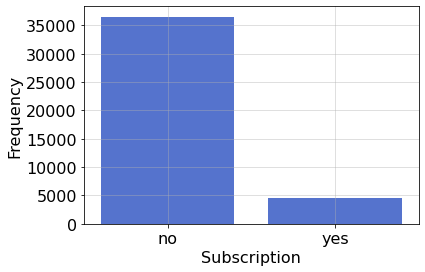

In [13]:
gy=sns.countplot(x="y",data=data, color = "#4169E1");
#plt.title('Subscription to a Term Deposit',size = 16)
plt.grid(alpha=0.5)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Subscription',size=16)
plt.ylabel('Frequency',size=16)
plt.savefig('image/1_y_countplot.png',bbox_inches = 'tight')

In [14]:
data['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

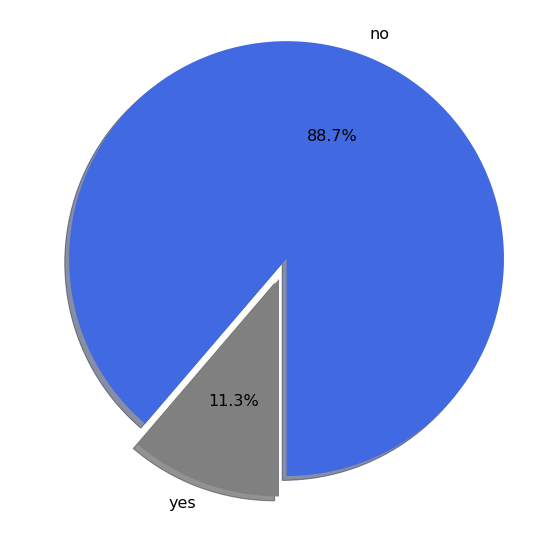

In [15]:
# Plot pie chart
labels =data['y'].value_counts(sort = True).index
sizes = data['y'].value_counts(sort = True)
colors = ["#4169E1","#808080"]
explode = (0.1,0)  # explode 1st slice
rcParams['figure.figsize'] = 10,10
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=270,textprops={'fontsize': 16})
#plt.title('Has the Client Subscribed a Term Deposit?',size = 16)
plt.savefig('image/1_y_pie.png',bbox_inches = 'tight')
plt.show()

### Bank Client Data

### 4-2. age<a class="anchor" id="4-2"></a>

- numeric variable

In [16]:
data['age'].describe()

count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

In [17]:
data['age'].value_counts()

31    1947
32    1846
33    1833
36    1780
35    1759
      ... 
89       2
91       2
87       1
94       1
95       1
Name: age, Length: 78, dtype: int64

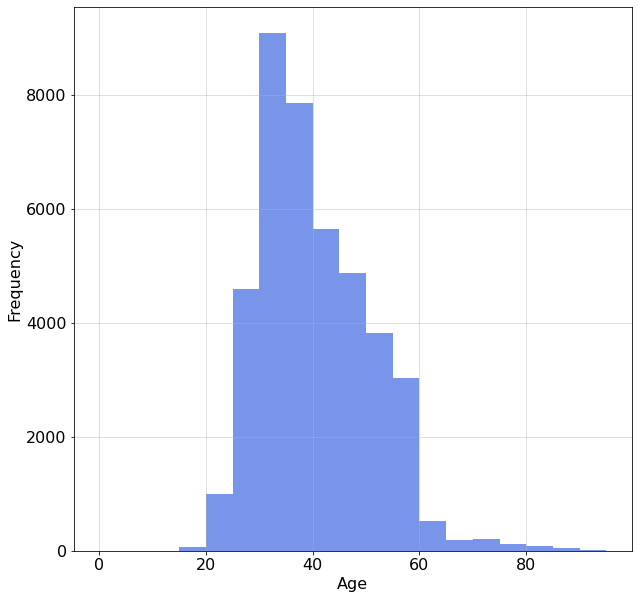

In [18]:
plt.hist(data.age, color="#4169E1",alpha=0.7, bins=np.arange(0,100,5))
#plt.title('Distribution of Age',size = 16)
plt.grid(alpha=0.5)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Age',size=16)
plt.ylabel('Frequency',size=16)
plt.savefig('image/2_age_dist.png',bbox_inches = 'tight')

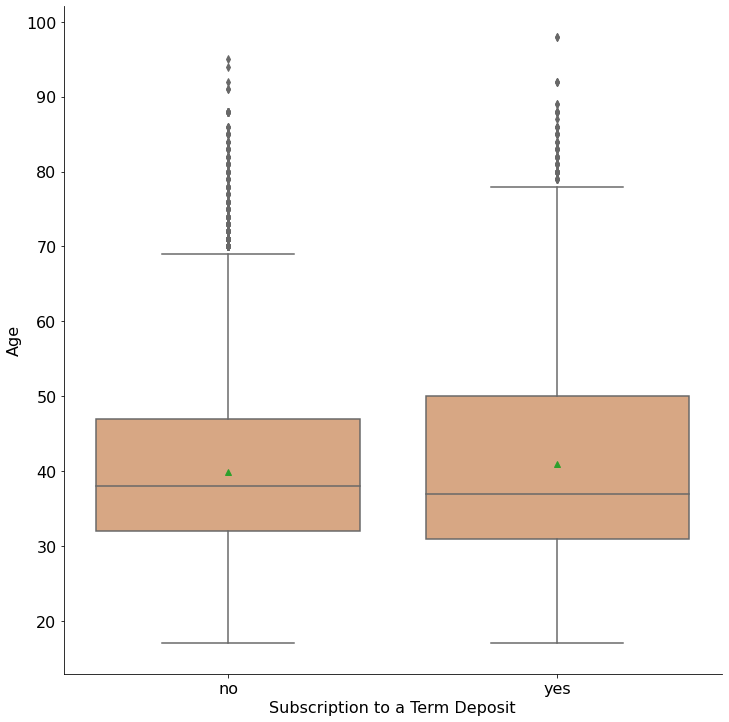

In [19]:
gage_y = sns.catplot(x="y",y="age",data=data,  kind="box", height = 10, color="#e5a576",showmeans=True)
plt.xlabel('Subscription to a Term Deposit',size=16)
plt.ylabel('Age',size=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
#plt.title('Age and Subscription to a Term Deposit',size = 20)
plt.savefig('image/2_age_y_box.png',bbox_inches = 'tight')

No significant difference in age observed between those who subscribed to a term deposit and those who did not. 

### 4-3. job<a class="anchor" id="4-3"></a>

- type of job 
- categorical: 12 categories
    - 'admin.'
    - 'blue-collar'
    - 'entrepreneur'
    - 'housemaid'
    - 'management'
    - 'retired'
    - 'self-employed'
    - 'services'
    - 'student'
    - 'technician'
    - 'unemployed'
    - 'unknown'

In [20]:
data['job'].describe()

count      41188
unique        12
top       admin.
freq       10422
Name: job, dtype: object

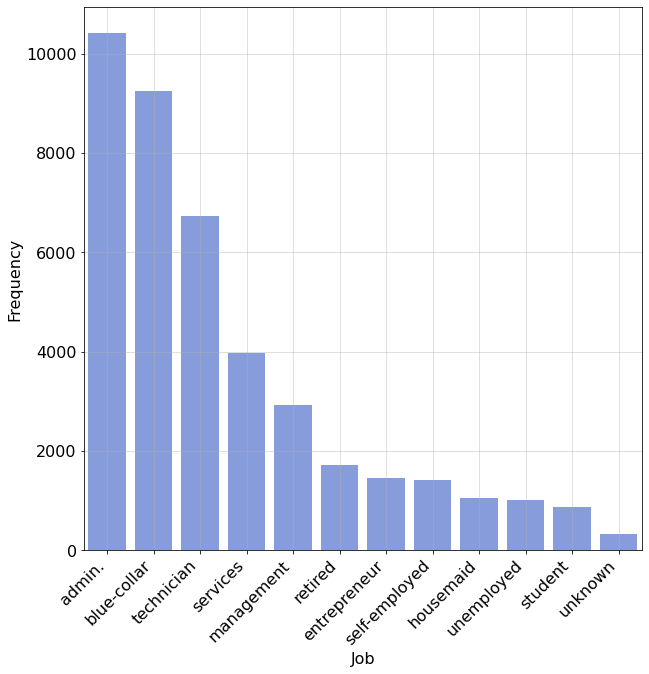

In [21]:
gjob=sns.countplot(x="job",data=data, alpha = 0.7, color = "#4169E1", order = data['job'].value_counts().index);
gjob.set_xticklabels(gjob.get_xticklabels(), rotation=45, ha="right", size=16);
# plt.title('Type of Job',size = 16)
plt.grid(alpha=0.5)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Job',size=16)
plt.ylabel('Frequency',size=16)
plt.savefig('image/3_job_countplot.png',bbox_inches = 'tight')

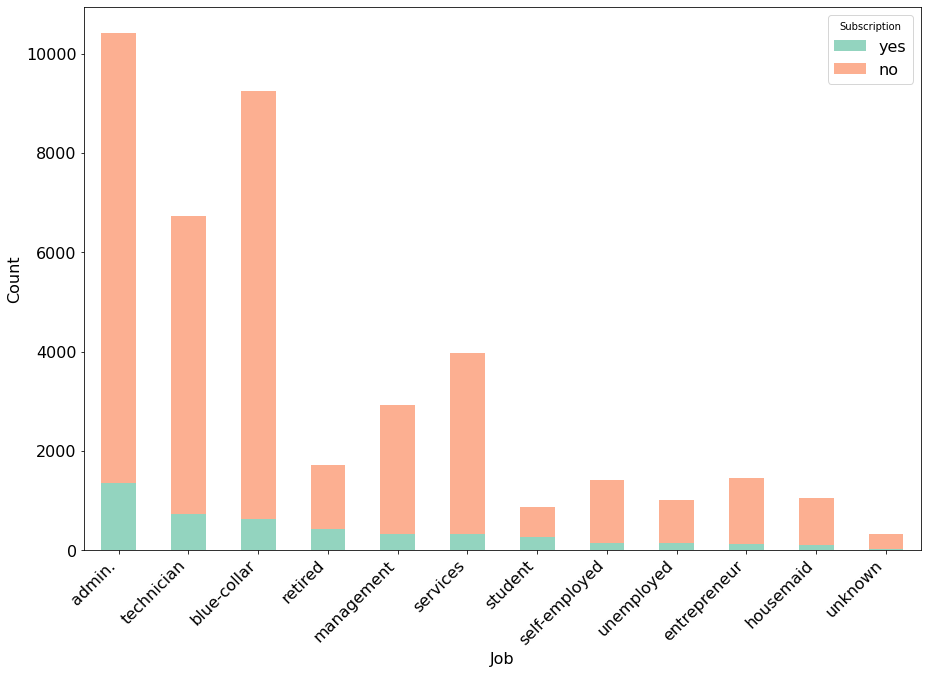

In [22]:
# Pivot Table 
job_y_pivot = pd.pivot_table(data, columns='y', index='job', aggfunc='count', values='age')
job_y_pivot = job_y_pivot[["yes","no"]] #change the order so that the "yes" is on the bottom
# Plot
pal = sns.color_palette("Set2")
gjob_y = job_y_pivot.sort_values(['yes'],ascending=False).plot(kind='bar',stacked=True, figsize=(15,10), color=pal, alpha=0.7)
#plt.title('Type of Job and Term Deposit Subscription', size=16)
plt.legend(title="Subscription", fontsize=16, fancybox=True)
gjob_y.set_xticklabels(gjob_y.get_xticklabels(), rotation=45, ha="right", size=16);
gjob_y.set_yticklabels(gjob.get_yticklabels(), rotation=0, ha="right", size=16);
plt.ylabel('Count', size=16)
plt.xlabel('Job',size=16)
plt.savefig('image/3_job_y_stacked.png',bbox_inches = 'tight')

In [23]:
job_y_pivot

y,yes,no
job,,
admin.,1352,9070
blue-collar,638,8616
entrepreneur,124,1332
housemaid,106,954
management,328,2596
retired,434,1286
self-employed,149,1272
services,323,3646
student,275,600


In [24]:
# Proportion Table
pivot = job_y_pivot 
pivot['total']=pivot['yes']+pivot['no']
pivot['yespor'] = pivot['yes']/pivot['total']*100
pivot['nopor'] = pivot['no']/pivot['total']*100
pivot.drop(['yes', 'no','total'], axis=1, inplace=True)

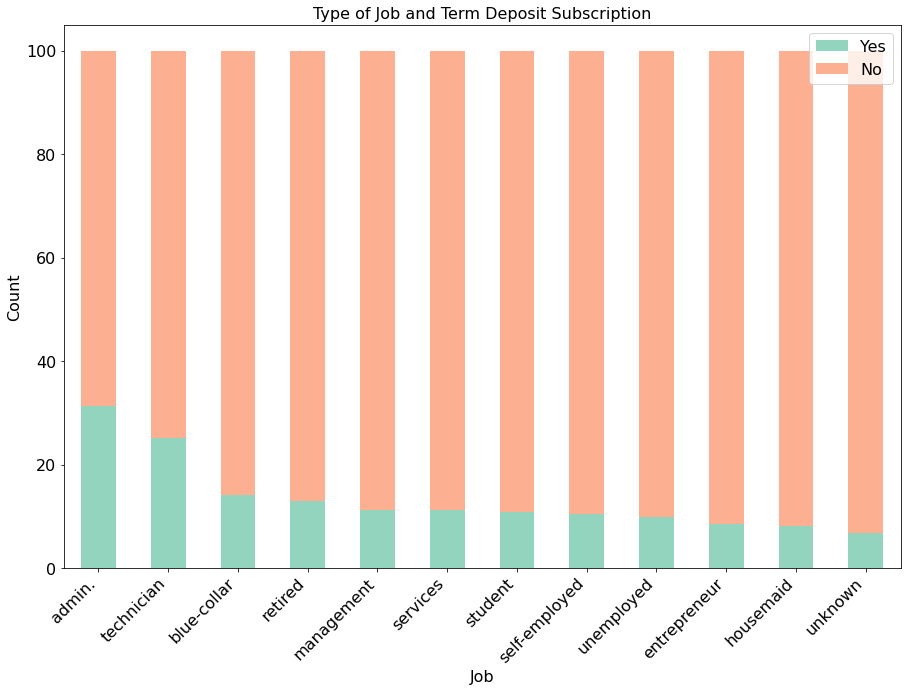

In [25]:
# Stacked Percentage Bar Graph
pg = pivot.sort_values(['yespor'],ascending=False).plot(kind='bar',stacked=True, figsize=(15,10), color=pal, alpha=0.7)
plt.title('Type of Job and Term Deposit Subscription', size=16)
plt.legend(title="Subscription", fontsize=16, fancybox=True)
pg.set_xticklabels(gjob_y.get_xticklabels(), rotation=45, ha="right", size=16);
plt.yticks(fontsize=16)
plt.ylabel('Count', size=16)
plt.xlabel('Job',size=16)
plt.legend(['Yes','No'], fontsize=16, loc='upper right')
plt.savefig('image/3_pg_job_y_stacked.png',bbox_inches = 'tight')

### 4-4. marital<a class="anchor" id="4-4"></a>

- marital status 
- categorical: 
    - 'divorced': divorced or widowed
    - 'married'
    - 'single'
    - 'unknown' 

In [26]:
data['marital'].describe()

count       41188
unique          4
top       married
freq        24928
Name: marital, dtype: object

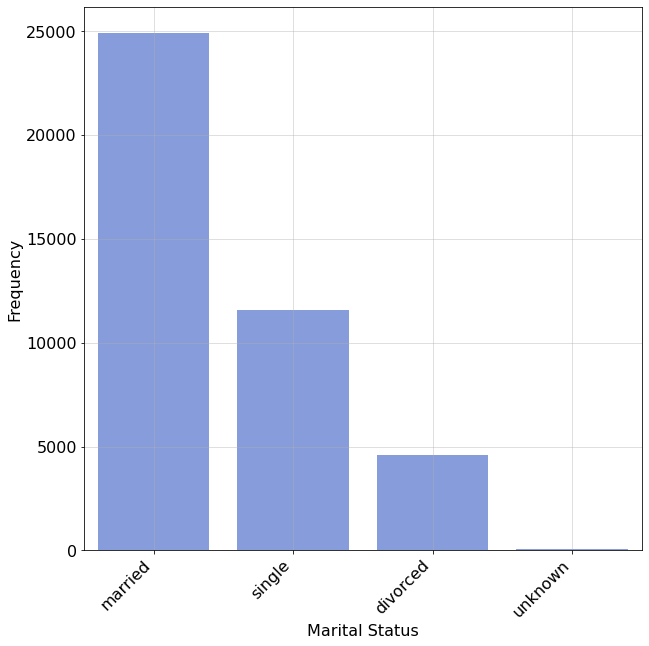

In [27]:
gmar=sns.countplot(x="marital",data=data, alpha=0.7, color = "#4169E1", order = data['marital'].value_counts().index);
gmar.set_xticklabels(gmar.get_xticklabels(), rotation=45, ha="right", size=16);
#plt.title('Marital Status',size = 16)
plt.grid(alpha=0.5)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Marital Status',size=16)
plt.ylabel('Frequency',size=16)
plt.savefig('image/4_marital_countplot.png',bbox_inches = 'tight')

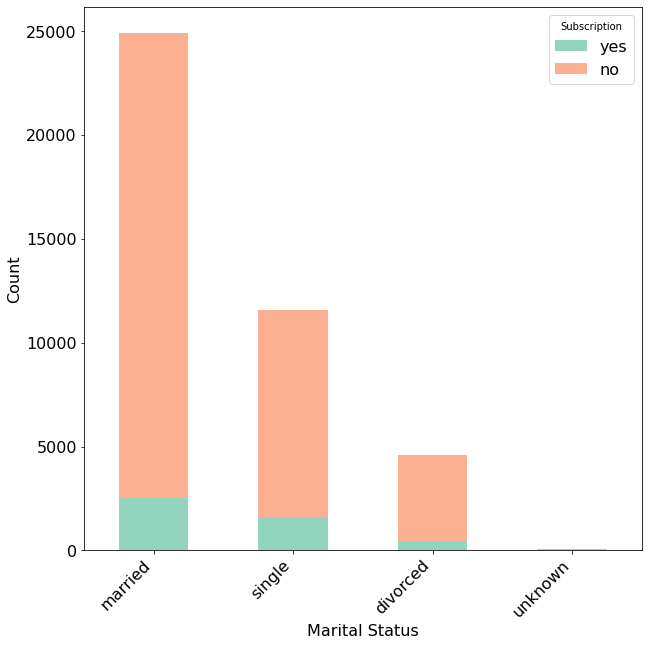

In [28]:
# Pivot Table 
mar_y_pivot = pd.pivot_table(data, columns='y', index='marital', aggfunc='count', values='age')
mar_y_pivot = mar_y_pivot[["yes","no"]] #change the order so that the "yes" is on the bottom
# Plot
# pal = sns.color_palette("Set2")
gmar_y = mar_y_pivot.sort_values(['yes'],ascending=False).plot(kind='bar',stacked=True, color=pal, alpha=0.7)
#plt.title('Marital Status and Term Deposit Subscritiption', size=16)
plt.legend(title="Subscription", fontsize=16, fancybox=True)
gmar_y.set_xticklabels(gmar.get_xticklabels(), rotation=45, ha="right", size=16);
plt.yticks(fontsize=16)
plt.ylabel('Count', size=16)
plt.xlabel('Marital Status',size=16)
plt.savefig('image/4_marital_y_stacked.png',bbox_inches = 'tight')

In [29]:
mar_y_pivot

y,yes,no
marital,,
divorced,476,4136
married,2532,22396
single,1620,9948
unknown,12,68


In [30]:
# Proportion Table
pivot = mar_y_pivot 
pivot['total']=pivot['yes']+pivot['no']
pivot['yespor'] = pivot['yes']/pivot['total']*100
pivot['nopor'] = pivot['no']/pivot['total']*100
pivot.drop(['yes', 'no','total'], axis=1, inplace=True)

#### Stacked Percentage Bar Graph
pg = pivot.sort_values(['yespor'],ascending=False).plot(kind='bar',stacked=True, figsize=(15,10), color=pal, alpha=0.7)
plt.title('Marital Status and Term Deposit Subscription', size=16)
plt.legend(title="Subscription", fontsize=16, fancybox=True)
pg.set_xticklabels(gmar_y.get_xticklabels(), rotation=45, ha="right", size=16);
plt.yticks(fontsize=16)
plt.ylabel('Percentage (%)', size=16)
plt.xlabel('Marital Status',size=16)
plt.legend(['Yes','No'], fontsize=16, loc='upper right')
plt.savefig('image/4_pg_mar_y_stacked.png',bbox_inches = 'tight')

### 4-5. education<a class="anchor" id="4-5"></a>

- categorical: 
    - 'basic.4y'
    - 'basic.6y'
    - 'basic.9y'
    - 'high.school'
    - 'illiterate'
    - 'professional.course'
    - 'university.degree'
    - 'unknown'

In [31]:
data['education'].describe()

count                 41188
unique                    8
top       university.degree
freq                  12168
Name: education, dtype: object

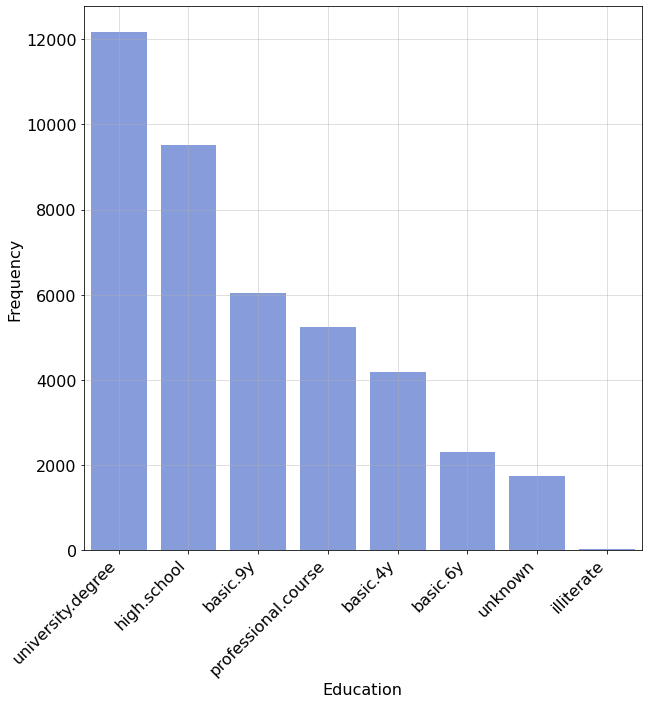

In [32]:
gedu=sns.countplot(x="education",data=data, alpha = 0.7, color = "#4169E1", order = data['education'].value_counts().index);
gedu.set_xticklabels(gedu.get_xticklabels(), rotation=45, ha="right", size=16);
#plt.title('Education',size = 16)
plt.grid(alpha=0.5)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Education',size=16)
plt.ylabel('Frequency',size=16)
plt.savefig('image/5_education_countplot.png',bbox_inches = 'tight')

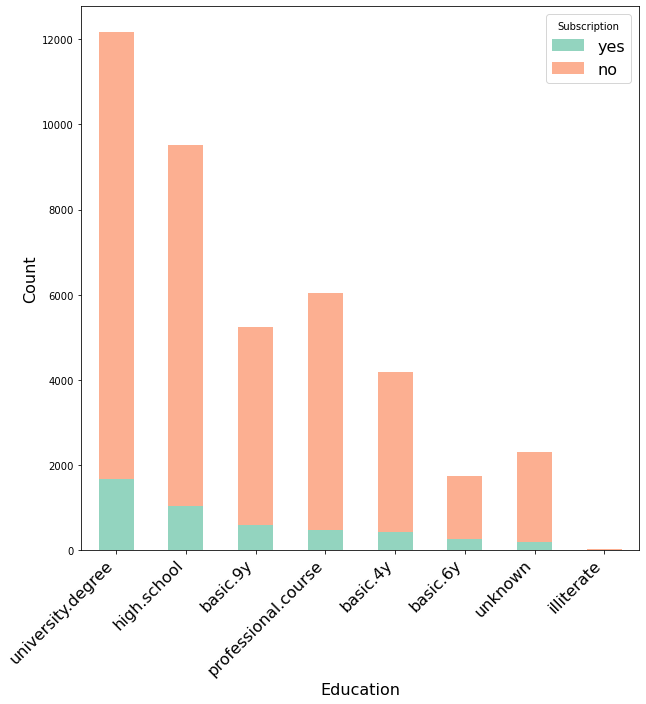

In [132]:
# Pivot Table 
edu_y_pivot = pd.pivot_table(data, columns='y', index='education', aggfunc='count', values='age')
edu_y_pivot = edu_y_pivot[["yes","no"]] #change the order so that the "yes" is on the bottom
# Plot
# pal = sns.color_palette("Set2")
gedu_y = edu_y_pivot.sort_values(['yes'],ascending=False).plot(kind='bar',stacked=True, color=pal, alpha=0.7)
#plt.title('Education Level and Term Deposit Subscritiption', size=16)
plt.legend(title="Subscription", fontsize=16, fancybox=True)
gedu_y.set_xticklabels(gedu.get_xticklabels(), rotation=45, ha="right", size=16);
plt.ylabel('Count', size=16)
plt.xlabel('Education',size=16)
plt.savefig('image/5_edu_y_stacked.png',bbox_inches = 'tight')

In [34]:
# Proportion Table
pivot = edu_y_pivot 
pivot['total']=pivot['yes']+pivot['no']
pivot['yespor'] = pivot['yes']/pivot['total']*100
pivot['nopor'] = pivot['no']/pivot['total']*100
pivot.drop(['yes', 'no','total'], axis=1, inplace=True)

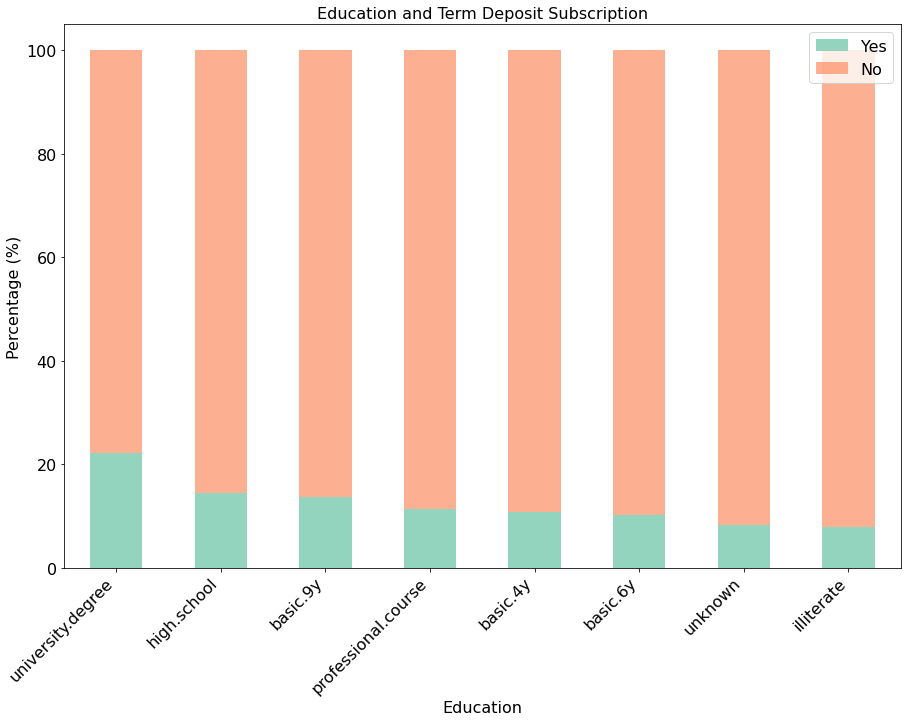

In [35]:
# Stacked Percentage Bar Graph
pg = pivot.sort_values(['yespor'],ascending=False).plot(kind='bar',stacked=True, figsize=(15,10), color=pal, alpha=0.7)
plt.title('Education and Term Deposit Subscription', size=16)
plt.legend(title="Subscription", fontsize=16, fancybox=True)
pg.set_xticklabels(gedu_y.get_xticklabels(), rotation=45, ha="right", size=16);
plt.yticks(fontsize=16)
plt.ylabel('Percentage (%)', size=16)
plt.xlabel('Education',size=16)
plt.legend(['Yes','No'], fontsize=16, loc='upper right')
plt.savefig('image/5_pg_edu_y_stacked.png',bbox_inches = 'tight')

### 4-6. default <a class="anchor" id="4-6"></a>

- has credit in default? 
    - if failed to make payment, account defaults
- categorical: 
    - 'no'
    - 'yes'
    - 'unknown'

In [36]:
data['default'].describe()

count     41188
unique        3
top          no
freq      32588
Name: default, dtype: object

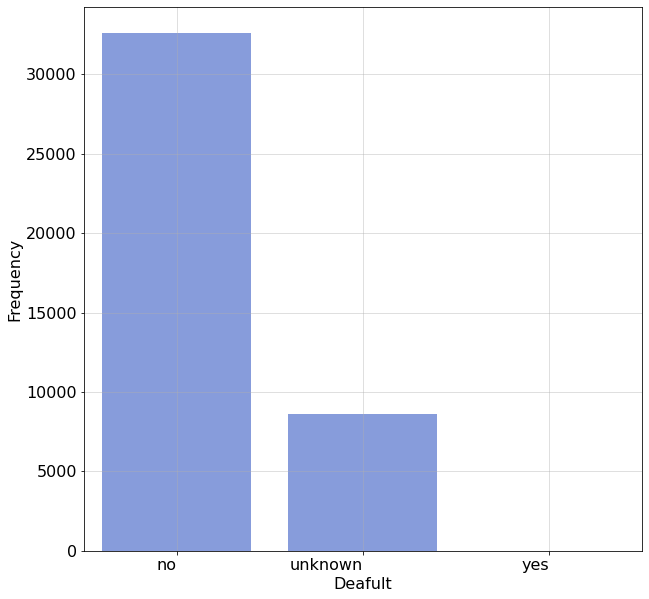

In [134]:
gdef=sns.countplot(x="default",data=data, color = "#4169E1", alpha=0.7, order = data['default'].value_counts().index);
gdef.set_xticklabels(gdef.get_xticklabels(), rotation=0, ha="right", size=16);
#plt.title('Credit in Default',size = 16)
plt.grid(alpha=0.5)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Deafult',size=16)
plt.ylabel('Frequency',size=16)
plt.savefig('image/6_default_countplot.png',bbox_inches = 'tight')

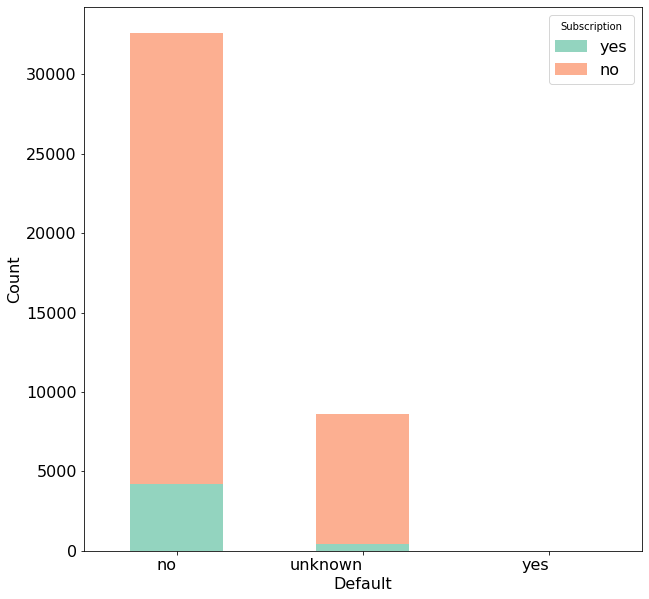

In [135]:
# Pivot Table 
def_y_pivot = pd.pivot_table(data, columns='y', index='default', aggfunc='count', values='age')
def_y_pivot = def_y_pivot[["yes","no"]] #change the order so that the "yes" is on the bottom
# Plot
# pal = sns.color_palette("Set2")
gdef_y = def_y_pivot.sort_values(['yes'],ascending=False).plot(kind='bar',stacked=True, color=pal, alpha=0.7)
#plt.title('Credit in Default and Term Deposit Subscritiption', size=16)
plt.legend(title="Subscription", fontsize=16, fancybox=True)
gdef_y.set_xticklabels(gdef_y.get_xticklabels(), rotation=0, ha="right", size=16);
gdef_y.set_yticklabels(gdef.get_yticklabels(), rotation=0, ha="right",size=16);
plt.ylabel('Count', size=16)
plt.xlabel('Default',size=16)
plt.savefig('image/6_default_y_stacked.png',bbox_inches = 'tight')

In [39]:
# Proportion Table
pivot = def_y_pivot 
pivot['total']=pivot['yes']+pivot['no']
pivot['yespor'] = pivot['yes']/pivot['total']*100
pivot['nopor'] = pivot['no']/pivot['total']*100
pivot.drop(['yes', 'no','total'], axis=1, inplace=True)

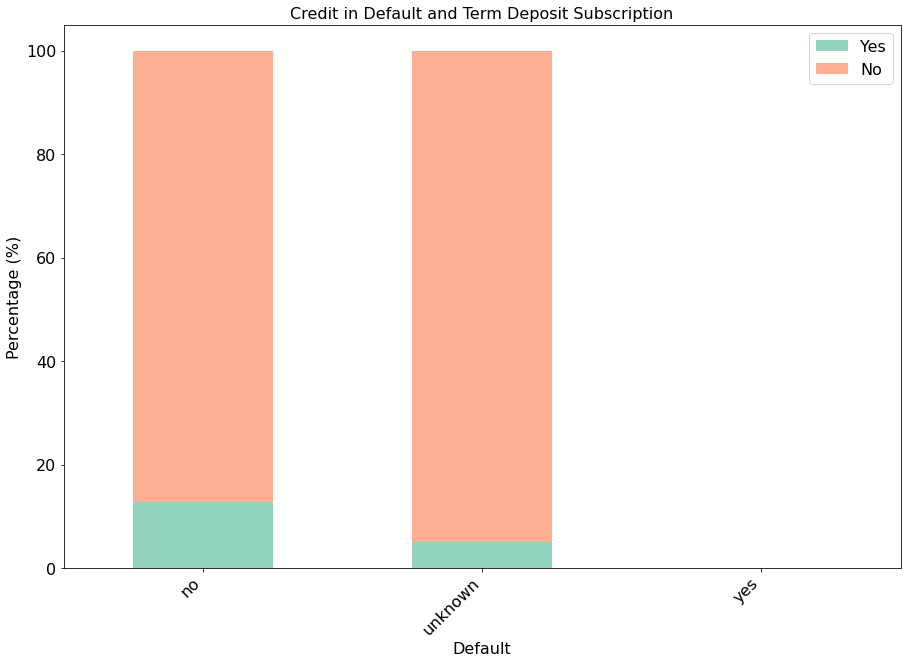

In [40]:
# Stacked Percentage Bar Graph
pg = pivot.sort_values(['yespor'],ascending=False).plot(kind='bar',stacked=True, figsize=(15,10), color=pal, alpha=0.7)
plt.title('Credit in Default and Term Deposit Subscription', size=16)
plt.legend(title="Subscription", fontsize=16, fancybox=True)
pg.set_xticklabels(gdef_y.get_xticklabels(), rotation=45, ha="right", size=16);
plt.yticks(fontsize=16)
plt.ylabel('Percentage (%)', size=16)
plt.xlabel('Default',size=16)
plt.legend(['Yes','No'], fontsize=16, loc='upper right')
plt.savefig('image/6_pg_def_y_stacked.png',bbox_inches = 'tight')

### 4-7. housing<a class="anchor" id="4-7"></a>

- has housing loan? 
- categorical: 
    - 'no'
    - 'yes'
    - 'unknown'

In [41]:
data['housing'].describe()

count     41188
unique        3
top         yes
freq      21576
Name: housing, dtype: object

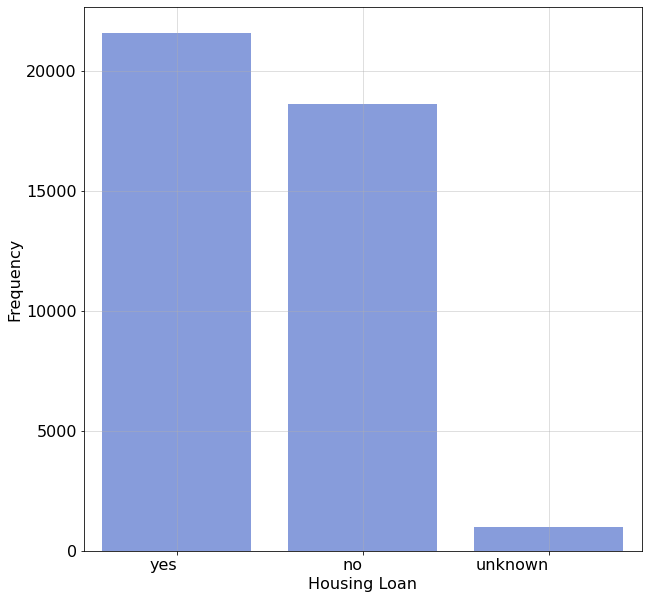

In [137]:
ghou=sns.countplot(x="housing",data=data, alpha=0.7, color = "#4169E1", order = data['housing'].value_counts().index);
ghou.set_xticklabels(ghou.get_xticklabels(), rotation=0, ha="right", size=16);
#plt.title('Housing Loan',size = 16)
plt.grid(alpha=0.5)
ghou.set_xticklabels(ghou.get_xticklabels(), rotation=0, ha="right", size=16);
plt.yticks(fontsize=16)
plt.xlabel('Housing Loan',size=16)
plt.ylabel('Frequency',size=16)
plt.savefig('image/7_housing_countplot.png',bbox_inches = 'tight')

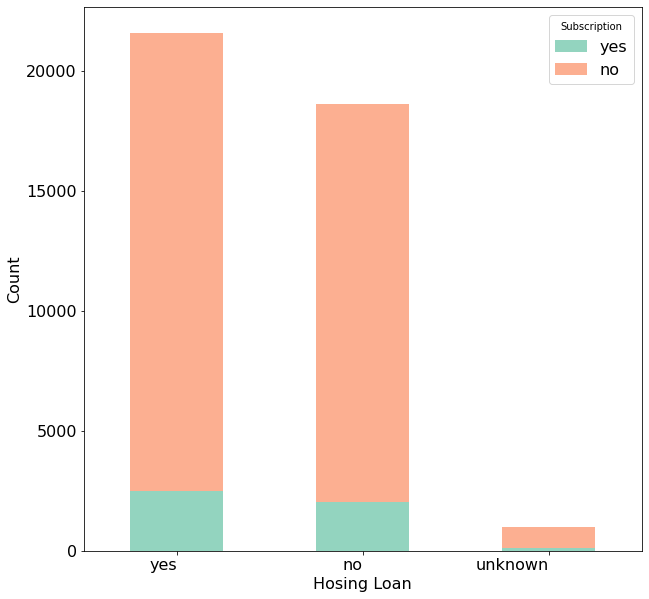

In [138]:
# Pivot Table 
hou_y_pivot = pd.pivot_table(data, columns='y', index='housing', aggfunc='count', values='age')
hou_y_pivot = hou_y_pivot[["yes","no"]] #change the order so that the "yes" is on the bottom
# Plot
# pal = sns.color_palette("Set2")
ghou_y = hou_y_pivot.sort_values(['yes'],ascending=False).plot(kind='bar',stacked=True, color=pal, alpha=0.7)
#plt.title('Housing Loan and Term Deposit Subscritiption', size=16)
plt.legend(title="Subscription", fontsize=16, fancybox=True)
ghou_y.set_xticklabels(ghou_y.get_xticklabels(), rotation=0, ha="right", size=16);
ghou_y.set_yticklabels(ghou.get_yticklabels(), rotation=0, ha="right",size=16);
plt.ylabel('Count', size=16)
plt.xlabel('Hosing Loan',size=16)
plt.savefig('image/7_hou_y_stacked.png',bbox_inches = 'tight')

In [44]:
# Proportion Table
pivot = hou_y_pivot 
pivot['total']=pivot['yes']+pivot['no']
pivot['yespor'] = pivot['yes']/pivot['total']*100
pivot['nopor'] = pivot['no']/pivot['total']*100
pivot.drop(['yes', 'no','total'], axis=1, inplace=True)

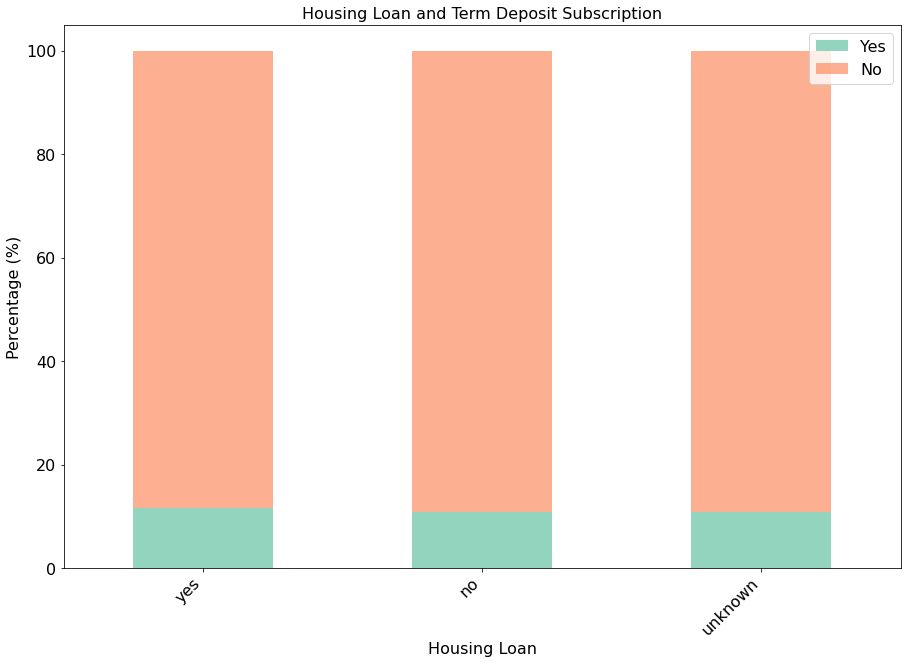

In [45]:
# Stacked Percentage Bar Graph
pg = pivot.sort_values(['yespor'],ascending=False).plot(kind='bar',stacked=True, figsize=(15,10), color=pal, alpha=0.7)
plt.title('Housing Loan and Term Deposit Subscription', size=16)
plt.legend(title="Subscription", fontsize=16, fancybox=True)
pg.set_xticklabels(ghou_y.get_xticklabels(), rotation=45, ha="right", size=16);
plt.yticks(fontsize=16)
plt.ylabel('Percentage (%)', size=16)
plt.xlabel('Housing Loan',size=16)
plt.legend(['Yes','No'], fontsize=16, loc='upper right')
plt.savefig('image/7_pg_hou_y_stacked.png',bbox_inches = 'tight')

### 4-8. loan <a class="anchor" id="4-8"></a>

- has personal loan? 
- categorical: 
    - 'no'
    - 'yes'
    - 'unknown'

In [46]:
data['loan'].describe()

count     41188
unique        3
top          no
freq      33950
Name: loan, dtype: object

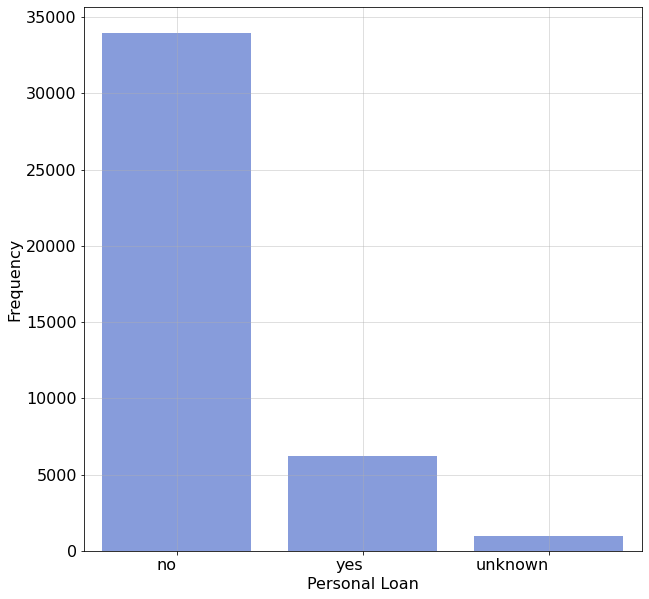

In [141]:
gloan=sns.countplot(x="loan",data=data, alpha=0.7, color = "#4169E1", order = data['loan'].value_counts().index);
gloan.set_xticklabels(gloan.get_xticklabels(), rotation=0, ha="right", size=16);
#plt.title('Personal Loan',size = 16)
plt.grid(alpha=0.5)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Personal Loan',size=16)
plt.ylabel('Frequency',size=16)
plt.savefig('image/8_loan_countplot.png',bbox_inches = 'tight')

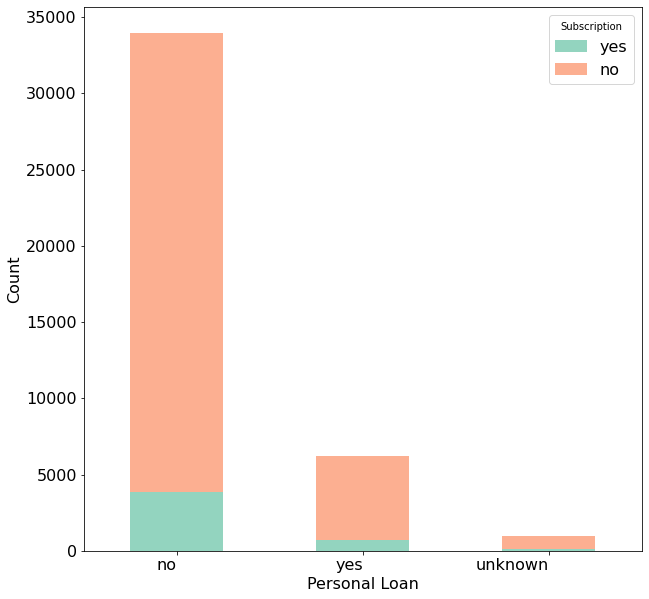

In [142]:
# Pivot Table 
loan_y_pivot = pd.pivot_table(data, columns='y', index='loan', aggfunc='count', values='age')
loan_y_pivot = loan_y_pivot[["yes","no"]] #change the order so that the "yes" is on the bottom
# Plot
# pal = sns.color_palette("Set2")
gloan_y = loan_y_pivot.sort_values(['yes'],ascending=False).plot(kind='bar',stacked=True, color=pal, alpha=0.7)
#plt.title('Personal Loan and Term Deposit Subscritiption', size=16)
plt.legend(title="Subscription", fontsize=16, fancybox=True)
gloan_y.set_xticklabels(gloan_y.get_xticklabels(), rotation=0, ha="right",size=16);
gloan_y.set_yticklabels(gloan.get_yticklabels(), rotation=0, ha="right",size=16);
plt.ylabel('Count', size=16)
plt.xlabel('Personal Loan',size=16)
plt.savefig('image/8_loan_y_stacked.png',bbox_inches = 'tight')

In [49]:
# Proportion Table
pivot = loan_y_pivot 
pivot['total']=pivot['yes']+pivot['no']
pivot['yespor'] = pivot['yes']/pivot['total']*100
pivot['nopor'] = pivot['no']/pivot['total']*100
pivot.drop(['yes', 'no','total'], axis=1, inplace=True)

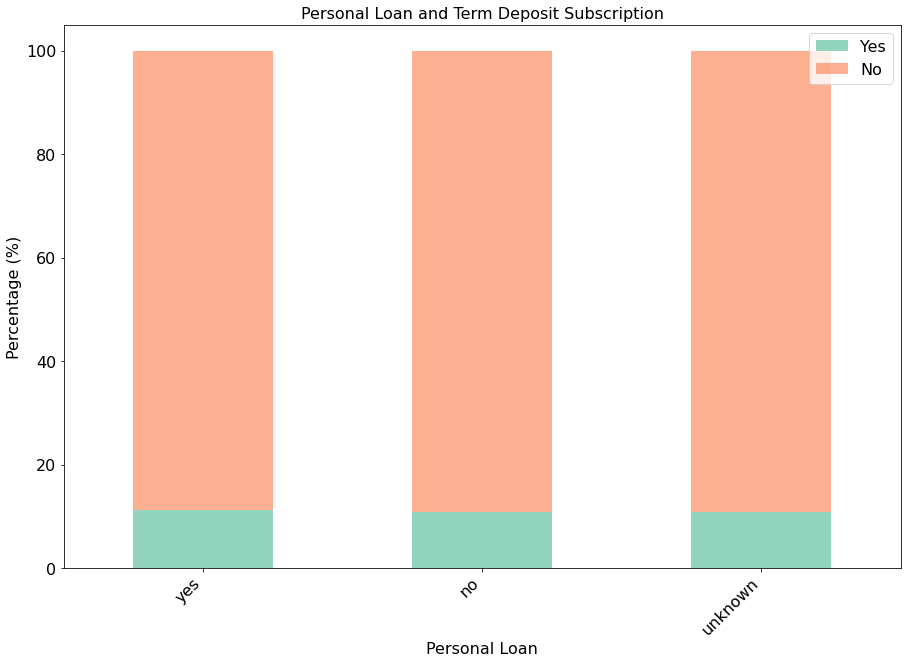

In [50]:
# Stacked Percentage Bar Graph
pg = pivot.sort_values(['yespor'],ascending=False).plot(kind='bar',stacked=True, figsize=(15,10), color=pal, alpha=0.7)
plt.title('Personal Loan and Term Deposit Subscription', size=16)
plt.legend(title="Subscription", fontsize=16, fancybox=True)
pg.set_xticklabels(ghou_y.get_xticklabels(), rotation=45, ha="right", size=16);
plt.yticks(fontsize=16)
plt.ylabel('Percentage (%)', size=16)
plt.xlabel('Personal Loan',size=16)
plt.legend(['Yes','No'], fontsize=16, loc='upper right')
plt.savefig('image/8_pg_loan_y_stacked.png',bbox_inches = 'tight')

### Related with the Last Contact of the Current Campaign

### 4-9. contact<a class="anchor" id="4-9"></a>

- contact communication type 
- categorical: 
    - 'cellular'
    - 'telephone'

In [51]:
data['contact'].describe()

count        41188
unique           2
top       cellular
freq         26144
Name: contact, dtype: object

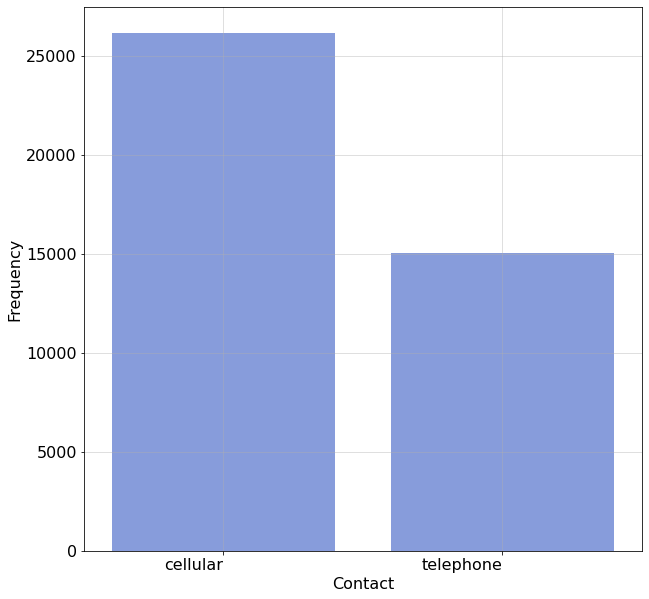

In [143]:
gcontact=sns.countplot(x="contact",data=data, alpha=0.7,color = "#4169E1", order = data['contact'].value_counts().index);
gcontact.set_xticklabels(gcontact.get_xticklabels(), rotation=0, ha="right", size=16);
#plt.title('Contact Communication Type',size = 16)
plt.grid(alpha=0.5)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Contact',size=16)
plt.ylabel('Frequency',size=16)
plt.savefig('image/9_contact_countplot.png',bbox_inches = 'tight')

In [53]:
data['contact'].value_counts()

cellular     26144
telephone    15044
Name: contact, dtype: int64

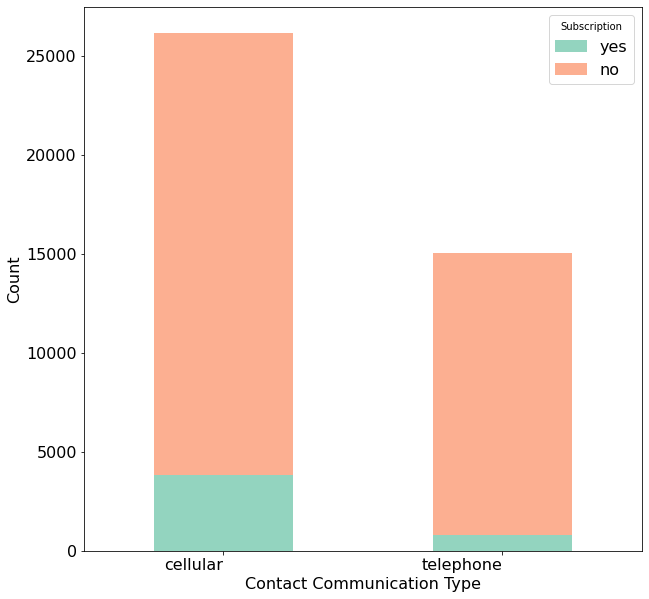

In [144]:
# Pivot Table 
contact_y_pivot = pd.pivot_table(data, columns='y', index='contact', aggfunc='count', values='age')
contact_y_pivot = contact_y_pivot[["yes","no"]] #change the order so that the "yes" is on the bottom
# Plot
# pal = sns.color_palette("Set2")
gcontact_y =contact_y_pivot.sort_values(['yes'],ascending=False).plot(kind='bar',stacked=True, color=pal, alpha=0.7)
#plt.title('Contact Communication Type and Term Deposit Subscritiption', size=16)
plt.legend(title="Subscription", fontsize=16, fancybox=True)
gcontact_y.set_xticklabels(gcontact_y.get_xticklabels(), rotation=0, ha="right",size=16);
gcontact_y.set_yticklabels(gcontact.get_yticklabels(), rotation=0, ha="right",size=16);
plt.ylabel('Count', size=16)
plt.xlabel('Contact Communication Type',size=16)
plt.savefig('image/9_contact_y_stacked.png',bbox_inches = 'tight')

In [55]:
# Proportion Table
pivot = contact_y_pivot 
pivot['total']=pivot['yes']+pivot['no']
pivot['yespor'] = pivot['yes']/pivot['total']*100
pivot['nopor'] = pivot['no']/pivot['total']*100
pivot.drop(['yes', 'no','total'], axis=1, inplace=True)

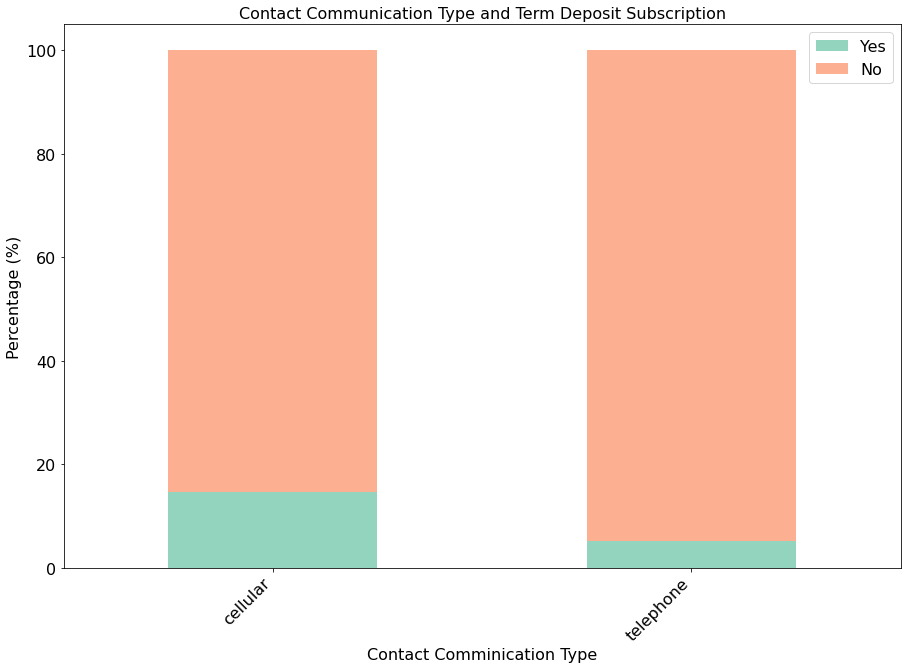

In [56]:
# Stacked Percentage Bar Graph
pg = pivot.sort_values(['yespor'],ascending=False).plot(kind='bar',stacked=True, figsize=(15,10), color=pal, alpha=0.7)
plt.title('Contact Communication Type and Term Deposit Subscription', size=16)
plt.legend(title="Subscription", fontsize=16, fancybox=True)
pg.set_xticklabels(gcontact_y.get_xticklabels(), rotation=45, ha="right", size=16);
plt.yticks(fontsize=16)
plt.ylabel('Percentage (%)', size=16)
plt.xlabel('Contact Comminication Type',size=16)
plt.legend(['Yes','No'], fontsize=16, loc='upper right')
plt.savefig('image/9_pg_contact_y_stacked.png',bbox_inches = 'tight')

### 4-10. month <a class="anchor" id="4-10"></a>

- last contact month of year
- categorical: 
    - 'jan'
    - 'feb'
    - 'mar'
    - …
    - 'nov'
    - 'dec'

In [57]:
data['month'].describe()

count     41188
unique       10
top         may
freq      13769
Name: month, dtype: object

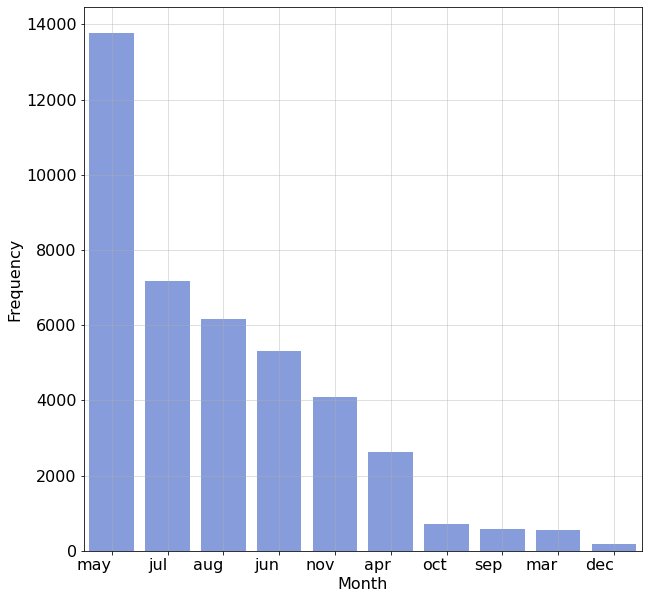

In [145]:
gmonth=sns.countplot(x="month",data=data, alpha=0.7,color = "#4169E1", order = data['month'].value_counts().index);
gmonth.set_xticklabels(gmonth.get_xticklabels(), rotation=0, ha="right", size=16);
#plt.title('Last Contact Month of Year',size = 20)
plt.grid(alpha=0.5)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Month',size=16)
plt.ylabel('Frequency',size=16)
plt.savefig('image/10_month_countplot.png',bbox_inches = 'tight')

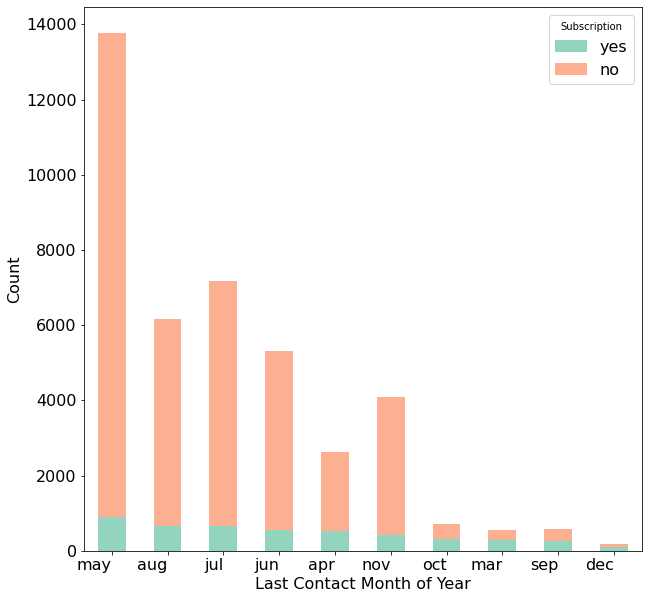

In [146]:
# Pivot Table 
month_y_pivot = pd.pivot_table(data, columns='y', index='month', aggfunc='count', values='age')
month_y_pivot = month_y_pivot[["yes","no"]] #change the order so that the "yes" is on the bottom
# Plot
# pal = sns.color_palette("Set2")
gmonth_y =month_y_pivot.sort_values(['yes'],ascending=False).plot(kind='bar',stacked=True, color=pal, alpha=0.7)
#plt.title('Last Contact Month of Year and Term Deposit Subscritiption', size=16)
plt.legend(title="Subscription", fontsize=16, fancybox=True)
gmonth_y.set_xticklabels(gmonth_y.get_xticklabels(), rotation=0, ha="right",size=16);
gmonth_y.set_yticklabels(gmonth.get_yticklabels(), rotation=0, ha="right",size=16);
plt.ylabel('Count', size=16)
plt.xlabel('Last Contact Month of Year',size=16)
plt.savefig('image/10_month_y_stacked.png',bbox_inches = 'tight')

In [60]:
# Proportion Table
pivot = month_y_pivot 
pivot['total']=pivot['yes']+pivot['no']
pivot['yespor'] = pivot['yes']/pivot['total']*100
pivot['nopor'] = pivot['no']/pivot['total']*100
pivot.drop(['yes', 'no','total'], axis=1, inplace=True)

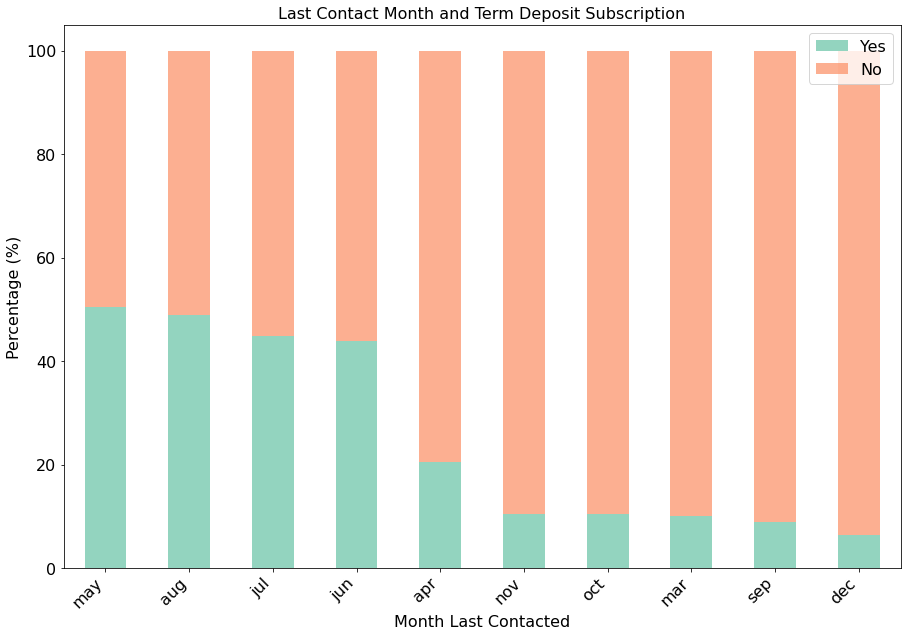

In [61]:
# Stacked Percentage Bar Graph
pg = pivot.sort_values(['yespor'],ascending=False).plot(kind='bar',stacked=True, figsize=(15,10), color=pal, alpha=0.7)
plt.title('Last Contact Month and Term Deposit Subscription', size=16)
plt.legend(title="Subscription", fontsize=16, fancybox=True)
pg.set_xticklabels(gmonth_y.get_xticklabels(), rotation=45, ha="right", size=16);
plt.yticks(fontsize=16)
plt.ylabel('Percentage (%)', size=16)
plt.xlabel('Month Last Contacted',size=16)
plt.legend(['Yes','No'], fontsize=16, loc='upper right')
plt.savefig('image/10_pg_month_y_stacked.png',bbox_inches = 'tight')

### 4-11. day_of_week <a class="anchor" id="4-11"></a>

- Last contact day of the week 
- categorical:
    - 'mon'
    - 'tue'
    - 'wed'
    - 'thu'
    - 'fri'

In [62]:
data['day_of_week'].describe()

count     41188
unique        5
top         thu
freq       8623
Name: day_of_week, dtype: object

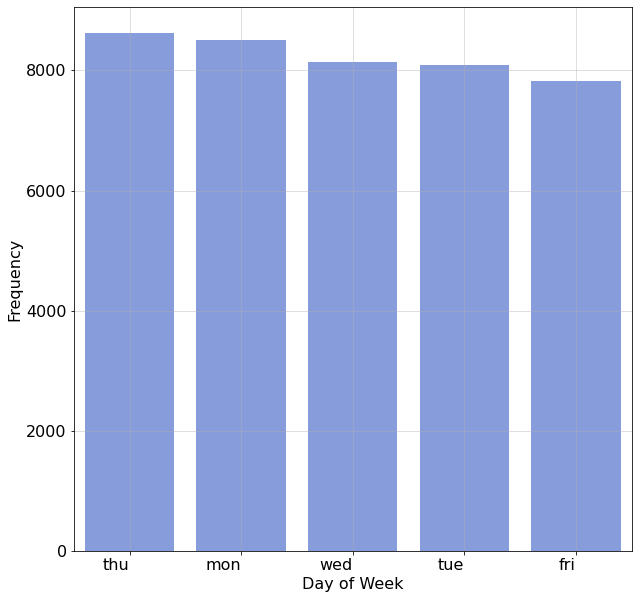

In [147]:
gdow=sns.countplot(x="day_of_week",data=data, alpha=0.7,color = "#4169E1", order = data['day_of_week'].value_counts().index);
gdow.set_xticklabels(gdow.get_xticklabels(), rotation=0, ha="right", size=16);
#plt.title('Last Contact Day of Week',size = 20)
plt.grid(alpha=0.5)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Day of Week',size=16)
plt.ylabel('Frequency',size=16)
plt.savefig('image/11_ddow_countplot.png',bbox_inches = 'tight')

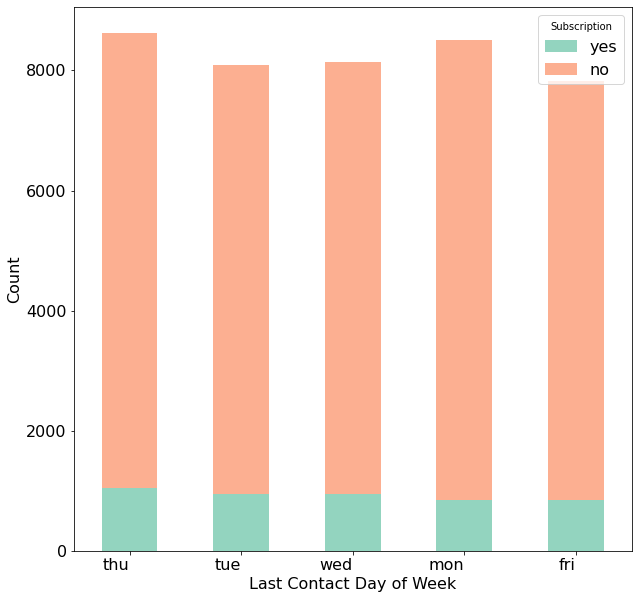

In [148]:
# Pivot Table 
dow_y_pivot = pd.pivot_table(data, columns='y', index='day_of_week', aggfunc='count', values='age')
dow_y_pivot = dow_y_pivot[["yes","no"]] #change the order so that the "yes" is on the bottom
# Plot
# pal = sns.color_palette("Set2")
gdow_y =dow_y_pivot.sort_values(['yes'],ascending=False).plot(kind='bar',stacked=True, color=pal, alpha=0.7)
#plt.title('Last Contact Day of Week and Term Deposit Subscritiption', size=16)
plt.legend(title="Subscription", fontsize=16, fancybox=True)
gdow_y.set_xticklabels(gdow_y.get_xticklabels(), rotation=0, ha="right",size=16);
gdow_y.set_yticklabels(gdow.get_yticklabels(), rotation=0, ha="right",size=16);
plt.ylabel('Count', size=16)
plt.xlabel('Last Contact Day of Week',size=16)
plt.savefig('image/11_dow_y_stacked.png',bbox_inches = 'tight')

In [65]:
# Proportion Table
pivot = dow_y_pivot 
pivot['total']=pivot['yes']+pivot['no']
pivot['yespor'] = pivot['yes']/pivot['total']*100
pivot['nopor'] = pivot['no']/pivot['total']*100
pivot.drop(['yes', 'no','total'], axis=1, inplace=True)

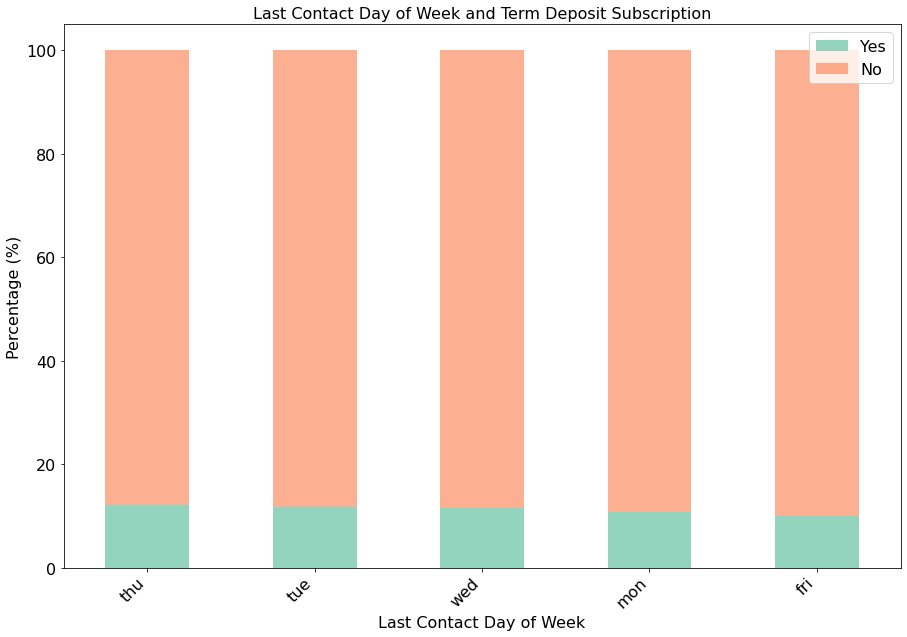

In [66]:
# Stacked Percentage Bar Graph
pg = pivot.sort_values(['yespor'],ascending=False).plot(kind='bar',stacked=True, figsize=(15,10), color=pal, alpha=0.7)
plt.title('Last Contact Day of Week and Term Deposit Subscription', size=16)
plt.legend(title="Subscription", fontsize=16, fancybox=True)
pg.set_xticklabels(gdow_y.get_xticklabels(), rotation=45, ha="right", size=16);
plt.yticks(fontsize=16)
plt.ylabel('Percentage (%)', size=16)
plt.xlabel('Last Contact Day of Week',size=16)
plt.legend(['Yes','No'], fontsize=16, loc='upper right')
plt.savefig('image/11_pg_dow_y_stacked.png',bbox_inches = 'tight')

### 4-12. duration<a class="anchor" id="4-12"></a>

- last contact duration, in seconds 
- numeric

In [67]:
data['duration'].describe()

count    41188.000000
mean       258.285010
std        259.279249
min          0.000000
25%        102.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

In [68]:
data['duration'].value_counts()

85      170
90      170
136     168
73      167
124     164
       ... 
1108      1
980       1
4918      1
2453      1
2015      1
Name: duration, Length: 1544, dtype: int64

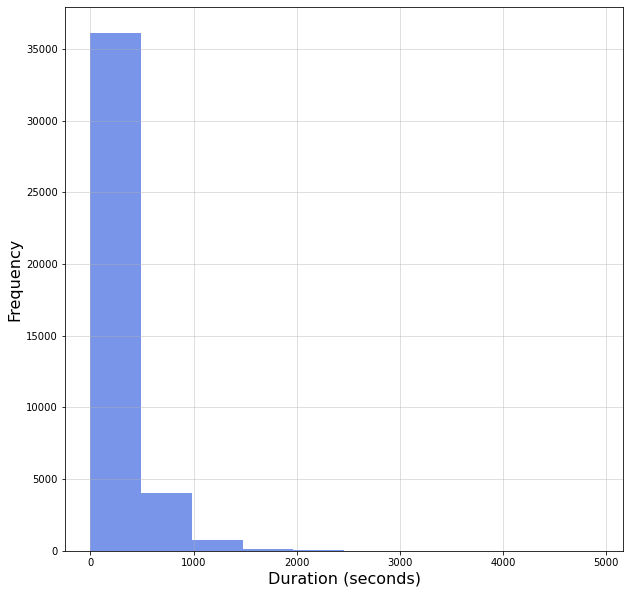

In [156]:
gdur = plt.hist(data.duration, alpha=0.7, color="#4169E1")
#plt.title('Distribution of Last Contact Duration',size = 20)
plt.grid(alpha=0.5)
plt.xlabel('Duration (seconds)',size=16)
plt.ylabel('Frequency',size=16)
plt.savefig('image/12_duration_dist.png',bbox_inches = 'tight')

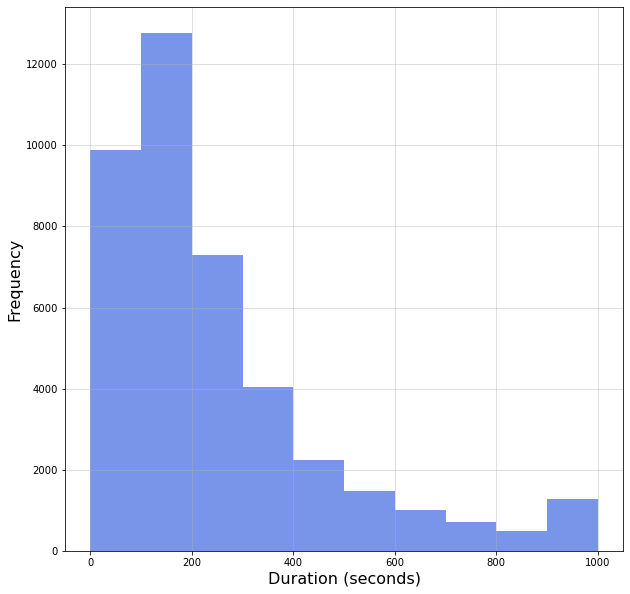

In [155]:
duration_clipped = data['duration'].clip(0,1000)
gdur = plt.hist(duration_clipped, alpha=0.7, color="#4169E1")
#plt.title('Distribution of Last Contact Duration',size = 20)
plt.grid(alpha=0.5)
plt.xlabel('Duration (seconds)',size=16)
plt.ylabel('Frequency',size=16)
plt.savefig('image/12_durationclipped_dist.png',bbox_inches = 'tight')

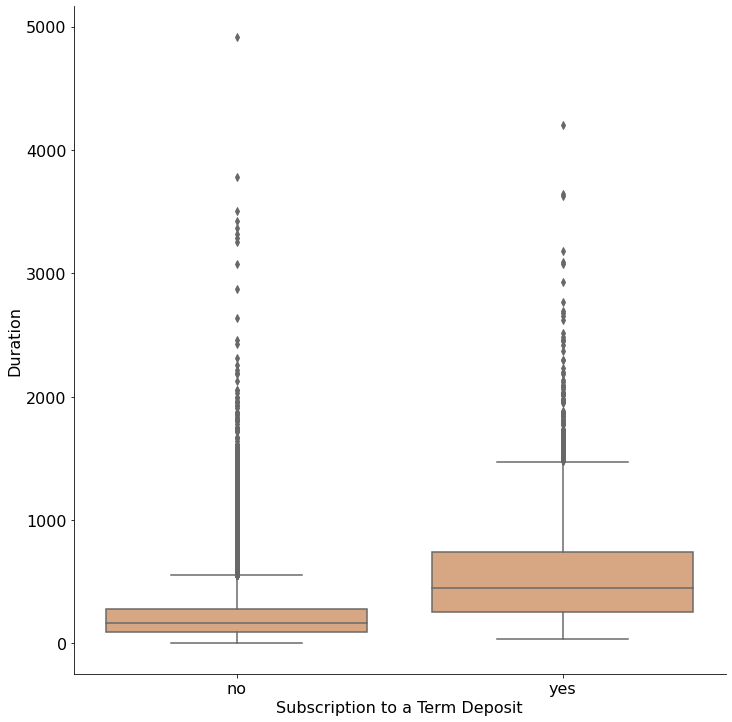

In [157]:
gdur_y = sns.catplot(x="y",y="duration",data=data,  kind="box", height = 10, color="#e5a576")
plt.xlabel('Subscription to a Term Deposit',size=16)
plt.ylabel('Duration',size=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
#plt.title('Last Contact Duration and Subscription to a Term Deposit',size = 20)
plt.savefig('image/12_dur_y_box.png',bbox_inches = 'tight')

Looks like there is a significant difference between the last contact duration between the people who subscribed to a term deposit and those who didn't - however, as included in the note of the data set, this is natural. This feature highly affects the output target (the longer the duration of the call, the more likely that the client subscribed to a term deposit).

This feature will be excluded from the predictive model building because
1) duration cannot be known before the call and
3) after the call, the target, y, is known, 
and therefore, there would be no need for the predictive mdodel.


### Other Attributes

### 4-13. campaign<a class="anchor" id="4-13"></a>

- number of contacts performed during this campaign and for this client 
- numeric, includes last contact

In [71]:
data['campaign'].describe()

count    41188.000000
mean         2.567593
std          2.770014
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         56.000000
Name: campaign, dtype: float64

In [72]:
data['campaign'].value_counts()

1     17642
2     10570
3      5341
4      2651
5      1599
6       979
7       629
8       400
9       283
10      225
11      177
12      125
13       92
14       69
17       58
15       51
16       51
18       33
20       30
19       26
21       24
22       17
23       16
24       15
27       11
29       10
25        8
26        8
28        8
30        7
31        7
35        5
33        4
32        4
34        3
40        2
42        2
43        2
37        1
39        1
41        1
56        1
Name: campaign, dtype: int64

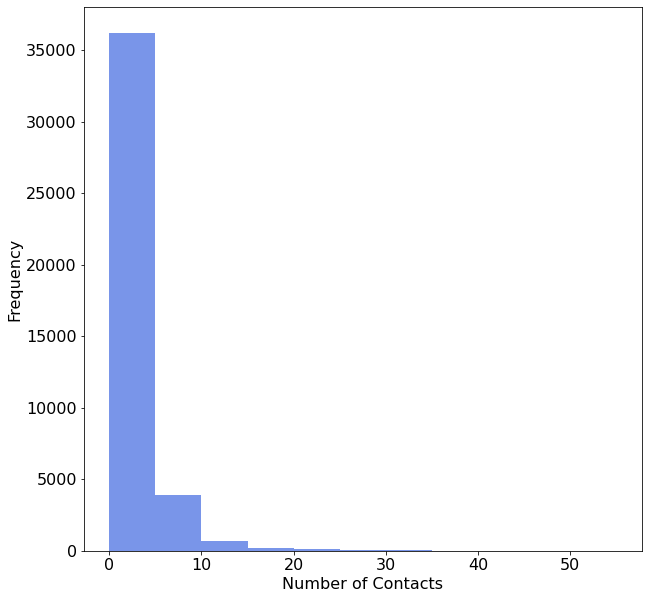

In [160]:
gcamp= plt.hist(data.campaign, color="#4169E1",alpha=0.7, bins=np.arange(0,60,5))
#plt.title('Histogram of Number of Contacts During the Campain for Each Client',size=16)
plt.xlabel('Number of Contacts',size=16)
plt.ylabel('Frequency',size=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig('image/13_campaign_hist.png',bbox_inches = 'tight')
plt.show()

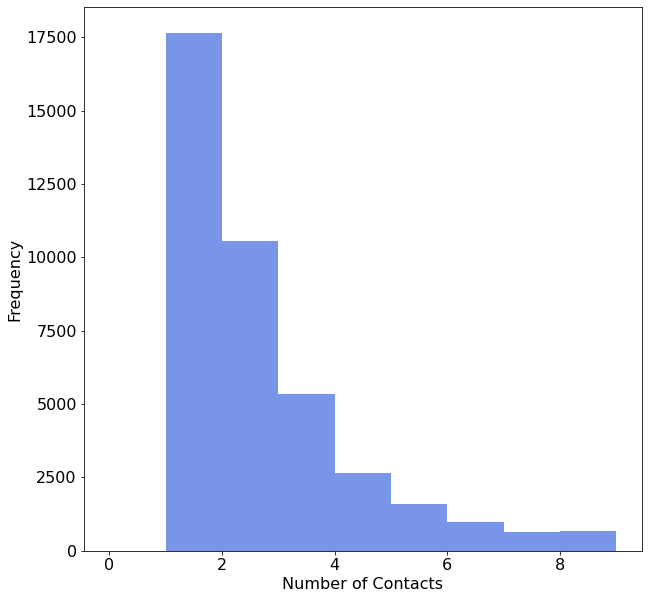

In [164]:
# Close up to 20 contacts
gcamp= plt.hist(data.campaign, color="#4169E1",alpha=0.7, bins=np.arange(0,10,1))
#plt.title('Histogram of Number of Contacts During the Campain for Each Client',size=16)
plt.xlabel('Number of Contacts',size=16)
plt.ylabel('Frequency',size=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig('image/13_campaignclipped_hist.png',bbox_inches = 'tight')
plt.show()

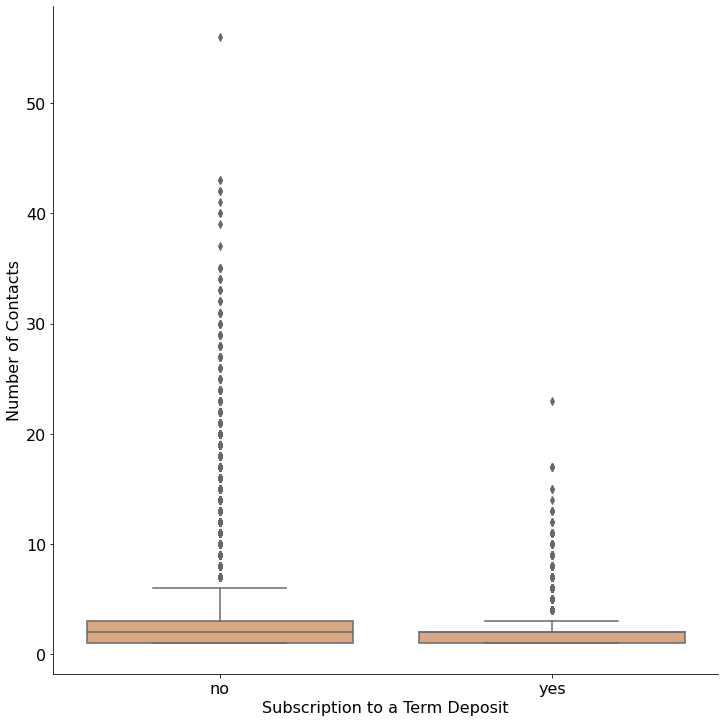

In [162]:
gcamp_y = sns.catplot(x="y",y="campaign",data=data,  kind="box", height = 10, color="#e5a576")
plt.xlabel('Subscription to a Term Deposit',size=16)
plt.ylabel('Number of Contacts', rotation=90, size=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
#plt.title('Number of Contacts During Campaign and Subscription to a Term Deposit',size = 20)
plt.savefig('image/13_camp_y_box.png',bbox_inches = 'tight')

In [76]:
campaign_clipped = data.loc[data['campaign']<10]
campaign_clipped.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,40094.000000,40094.000000,40094.000000,40094.000000,40094.000000,40094.000000,40094.000000,40094.000000,40094.000000,40094.000000
mean,40.016037,260.784756,2.230458,961.528109,0.177234,0.053739,93.566506,-40.505562,3.592380,5165.806210
std,10.441259,259.288412,1.622189,189.226363,0.500332,1.576825,0.579538,4.658117,1.742269,72.590341
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,105.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,182.000000,2.000000,999.000000,0.000000,1.100000,93.444000,-41.800000,4.857000,5191.000000
75%,47.000000,322.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,9.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


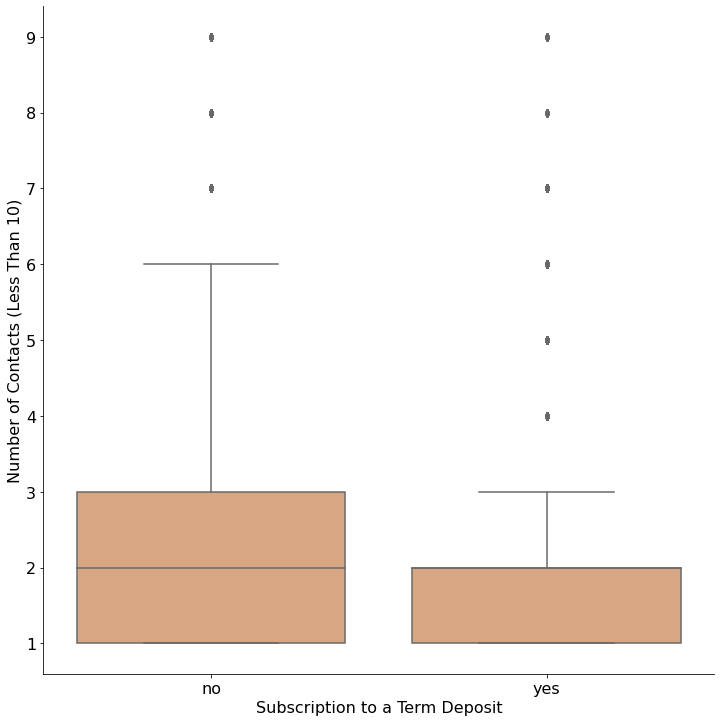

In [163]:
gcampclipped_y = sns.catplot(x="y",y="campaign",data=campaign_clipped,  kind="box", height = 10, color="#e5a576")
plt.xlabel('Subscription to a Term Deposit',size=16)
plt.ylabel('Number of Contacts (Less Than 10)',rotation=90, size=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
#plt.title('Number of Contacts During Campaign and Subscription to a Term Deposit',size = 20)
plt.savefig('image/13_campclipped_y_box.png',bbox_inches = 'tight')

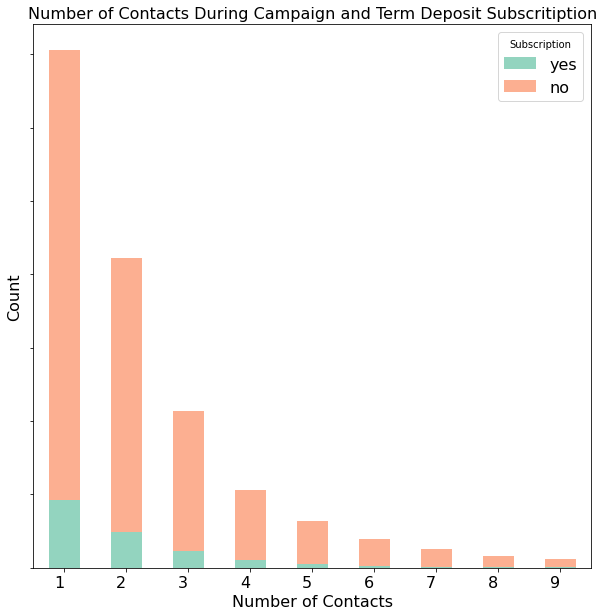

In [78]:
# Pivot Table 
camp_y_pivot = pd.pivot_table(campaign_clipped, columns='y', index='campaign', aggfunc='count', values='age')
camp_y_pivot = camp_y_pivot[["yes","no"]] #change the order so that the "yes" is on the bottom
# Plot
# pal = sns.color_palette("Set2")
gcamp_y =camp_y_pivot.sort_values(['yes'],ascending=False).plot(kind='bar',stacked=True, color=pal, alpha=0.7)
plt.title('Number of Contacts During Campaign and Term Deposit Subscritiption', size=16)
plt.legend(title="Subscription", fontsize=16, fancybox=True)
gcamp_y.set_xticklabels(gcamp_y.get_xticklabels(), rotation=0, ha="right",size=16);
gcamp_y.set_yticklabels(gcamp_y.get_yticklabels(), rotation=0, ha="right",size=16);
plt.ylabel('Count', size=16)
plt.xlabel('Number of Contacts',size=16)
plt.savefig('image/13_campclipped_y_stacked.png',bbox_inches = 'tight')

In [79]:
# Proportion Table
pivot = camp_y_pivot 
pivot['total']=pivot['yes']+pivot['no']
pivot['yespor'] = pivot['yes']/pivot['total']*100
pivot['nopor'] = pivot['no']/pivot['total']*100
pivot.drop(['yes', 'no','total'], axis=1, inplace=True)

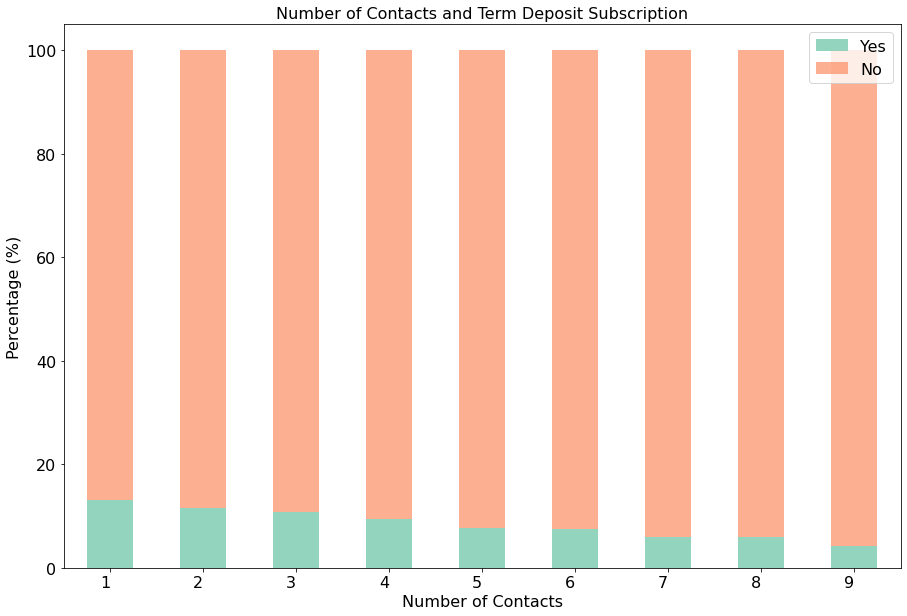

In [80]:
# Stacked Percentage Bar Graph
pg = pivot.sort_values(['yespor'],ascending=False).plot(kind='bar',stacked=True, figsize=(15,10), color=pal, alpha=0.7)
plt.title('Number of Contacts and Term Deposit Subscription', size=16)
plt.legend(title="Subscription", fontsize=16, fancybox=True)
pg.set_xticklabels(gcamp_y.get_xticklabels(), rotation=0, ha="right", size=16);
plt.yticks(fontsize=16)
plt.ylabel('Percentage (%)', size=16)
plt.xlabel('Number of Contacts',size=16)
plt.legend(['Yes','No'], fontsize=16, loc='upper right')
plt.savefig('image/13_pg_month_y_stacked.png',bbox_inches = 'tight')

### 4-14. pdays<a class="anchor" id="4-14"></a>

- number of days that passed by after the client was last contacted from a previous campaign 
- numeric
- 999 means client was not previously contacted

In [81]:
data['pdays'].describe()

count    41188.000000
mean       962.475454
std        186.910907
min          0.000000
25%        999.000000
50%        999.000000
75%        999.000000
max        999.000000
Name: pdays, dtype: float64

Because 999 was used to indicate that client was not previously contacted, this does not give any meaningful information. 

In [82]:
data['pdays'].value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
19         3
22         3
21         2
26         1
20         1
25         1
27         1
Name: pdays, dtype: int64

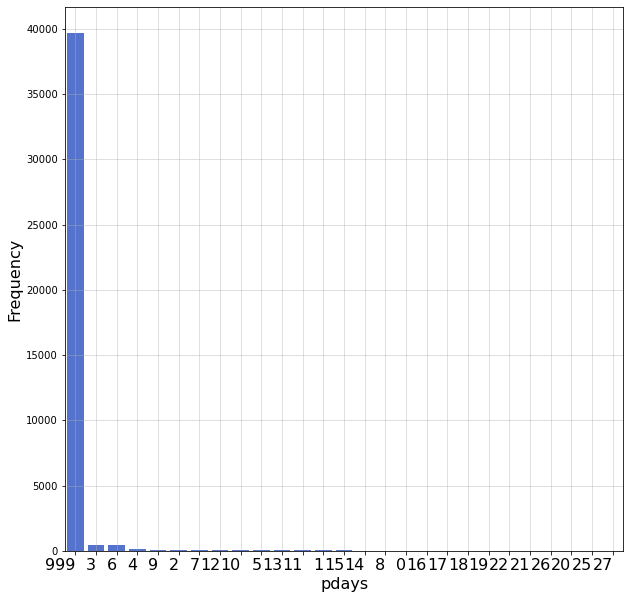

In [165]:
gpdays=sns.countplot(x="pdays",data=data, color = "#4169E1", order = data['pdays'].value_counts().index);
gpdays.set_xticklabels(gpdays.get_xticklabels(), rotation=0, ha="right", size=16);
#plt.title('Count Plot of Number of Days Passed After Client Was Last Contacted',size = 16)
plt.grid(alpha=0.5)
plt.xlabel('pdays',size=16)
plt.ylabel('Frequency',size=16)
plt.savefig('image/14_pdays_countplot.png',bbox_inches = 'tight')

The countplot does not give any meaninful insight cause there are too many cases of '999' (clinet was not previously contacted), which is 39673 cases.

In [84]:
pdays_alt=data[data['pdays']!=999]
pdays_alt

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
24108,37,admin.,married,university.degree,no,yes,no,telephone,nov,wed,...,1,6,1,success,-0.1,93.200,-42.0,4.286,5195.8,no
24264,48,management,married,university.degree,no,yes,no,cellular,nov,mon,...,1,4,1,success,-0.1,93.200,-42.0,4.191,5195.8,no
24279,42,technician,married,professional.course,unknown,yes,no,cellular,nov,mon,...,1,4,1,success,-0.1,93.200,-42.0,4.191,5195.8,no
24397,50,entrepreneur,married,university.degree,unknown,yes,no,cellular,nov,mon,...,1,3,1,success,-0.1,93.200,-42.0,4.191,5195.8,no
24482,36,self-employed,single,university.degree,no,yes,no,cellular,nov,mon,...,2,4,1,success,-0.1,93.200,-42.0,4.191,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41163,35,technician,divorced,basic.4y,no,yes,no,cellular,nov,tue,...,3,4,2,success,-1.1,94.767,-50.8,1.035,4963.6,yes
41164,54,admin.,married,professional.course,no,no,no,cellular,nov,tue,...,2,10,1,success,-1.1,94.767,-50.8,1.035,4963.6,yes
41174,62,retired,married,university.degree,no,yes,no,cellular,nov,thu,...,1,1,6,success,-1.1,94.767,-50.8,1.031,4963.6,yes
41178,62,retired,married,university.degree,no,no,no,cellular,nov,thu,...,2,6,3,success,-1.1,94.767,-50.8,1.031,4963.6,yes


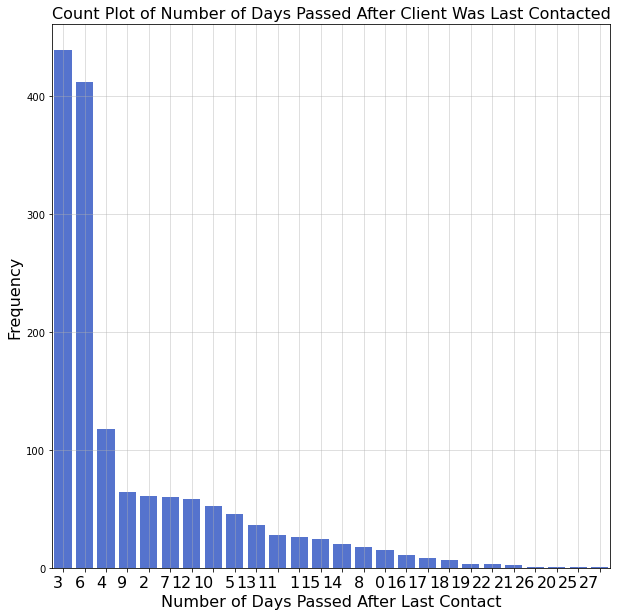

In [85]:
# Plot only the ones that was previously contacted
gpdays=sns.countplot(x="pdays",data=pdays_alt, color = "#4169E1", order = pdays_alt['pdays'].value_counts().index);
gpdays.set_xticklabels(gpdays.get_xticklabels(), rotation=0, ha="right", size=16);
#plt.title('Count Plot of Number of Days Passed After Client Was Last Contacted',size = 16)
plt.grid(alpha=0.5)
plt.xlabel('Number of Days Passed After Last Contact',size=16)
plt.ylabel('Frequency',size=16)
plt.savefig('image/14_pdays_countplot.png',bbox_inches = 'tight')

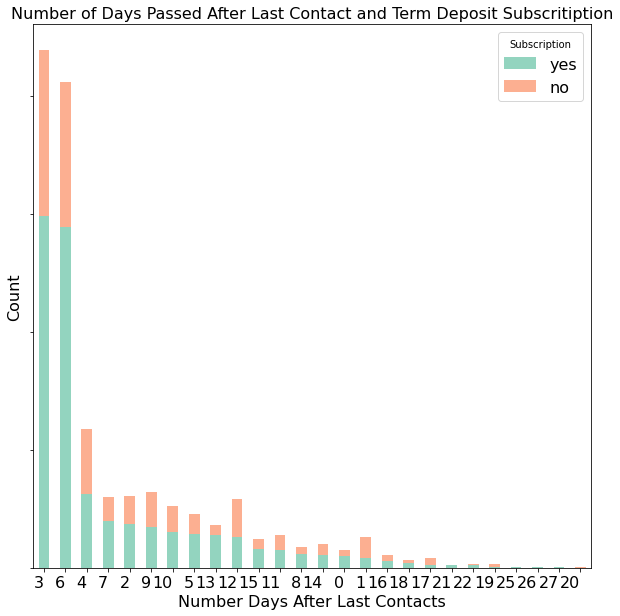

In [86]:
# Pivot Table 
pdays_y_pivot = pd.pivot_table(pdays_alt, columns='y', index='pdays', aggfunc='count', values='age')
pdays_y_pivot = pdays_y_pivot[["yes","no"]] #change the order so that the "yes" is on the bottom
# Plot
# pal = sns.color_palette("Set2")
gpdays_y=pdays_y_pivot.sort_values(['yes'],ascending=False).plot(kind='bar',stacked=True, color=pal, alpha=0.7)
plt.title('Number of Days Passed After Last Contact and Term Deposit Subscritiption', size=16)
plt.legend(title="Subscription", fontsize=16, fancybox=True)
gpdays_y.set_xticklabels(gpdays_y.get_xticklabels(), rotation=0, ha="right",size=16);
gpdays_y.set_yticklabels(gpdays_y.get_yticklabels(), rotation=0, ha="right",size=16);
plt.ylabel('Count', size=16)
plt.xlabel('Number Days After Last Contacts',size=16)
plt.savefig('image/14_pdays_y_stacked.png',bbox_inches = 'tight')

In [87]:
# Proportion Table
pivot = pdays_y_pivot 
pivot['total']=pivot['yes']+pivot['no']
pivot['yespor'] = pivot['yes']/pivot['total']*100
pivot['nopor'] = pivot['no']/pivot['total']*100
pivot.drop(['yes', 'no','total'], axis=1, inplace=True)

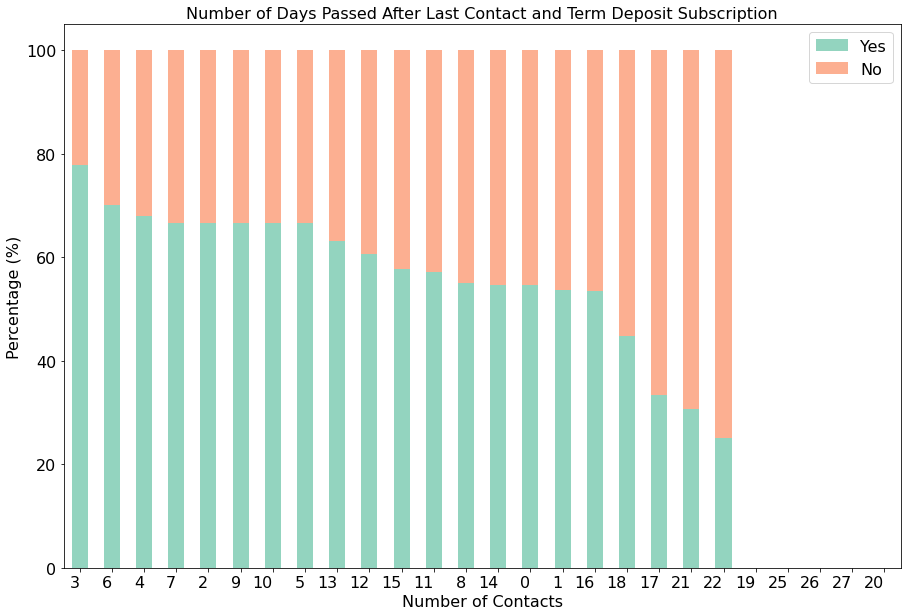

In [88]:
# Stacked Percentage Bar Graph
pg = pivot.sort_values(['yespor'],ascending=False).plot(kind='bar',stacked=True, figsize=(15,10), color=pal, alpha=0.7)
plt.title('Number of Days Passed After Last Contact and Term Deposit Subscription', size=16)
plt.legend(title="Subscription", fontsize=16, fancybox=True)
pg.set_xticklabels(gpdays_y.get_xticklabels(), rotation=0, ha="right", size=16);
plt.yticks(fontsize=16)
plt.ylabel('Percentage (%)', size=16)
plt.xlabel('Number of Contacts',size=16)
plt.legend(['Yes','No'], fontsize=16, loc='upper right')
plt.savefig('image/14_pg_pdays_y_stacked.png',bbox_inches = 'tight')

### 4-15. previous <a class="anchor" id="4-15"></a>

- number of contacts performed before this campaign and for this client 
- numeric

In [89]:
data['previous'].describe()

count    41188.000000
mean         0.172963
std          0.494901
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          7.000000
Name: previous, dtype: float64

In [90]:
data['previous'].value_counts()

0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64

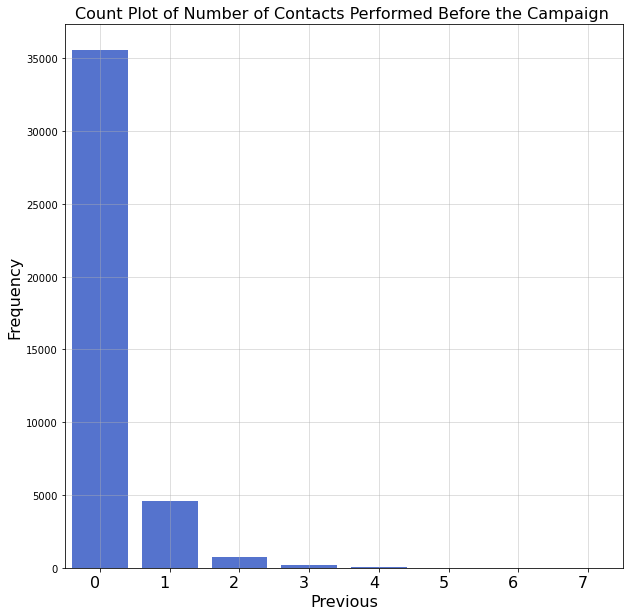

In [91]:
gprevious=sns.countplot(x="previous",data=data, color = "#4169E1", order = data['previous'].value_counts().index);
gprevious.set_xticklabels(gprevious.get_xticklabels(), rotation=0, ha="right", size=16);
plt.title('Count Plot of Number of Contacts Performed Before the Campaign ',size = 16)
plt.grid(alpha=0.5)
plt.xlabel('Previous',size=16)
plt.ylabel('Frequency',size=16)
plt.savefig('image/15_previous_countplot.png',bbox_inches = 'tight')

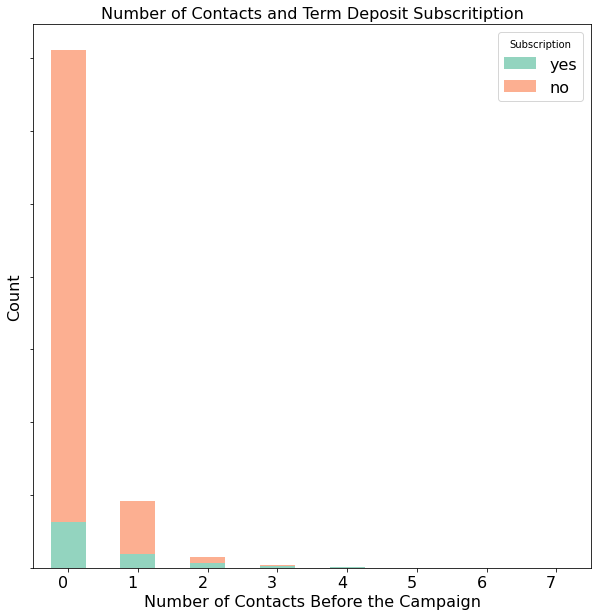

In [92]:
# Pivot Table 
previous_y_pivot = pd.pivot_table(data, columns='y', index='previous', aggfunc='count', values='age')
previous_y_pivot = previous_y_pivot[["yes","no"]] #change the order so that the "yes" is on the bottom
# Plot
# pal = sns.color_palette("Set2")
gprevious_y = previous_y_pivot.sort_values(['yes'],ascending=False).plot(kind='bar',stacked=True, color=pal, alpha=0.7)
plt.title('Number of Contacts and Term Deposit Subscritiption', size=16)
plt.legend(title="Subscription", fontsize=16, fancybox=True)
gprevious_y.set_xticklabels(gprevious_y.get_xticklabels(), rotation=0, ha="right",size=16);
gprevious_y.set_yticklabels(gprevious_y.get_yticklabels(), rotation=0, ha="right",size=16);
plt.ylabel('Count', size=16)
plt.xlabel('Number of Contacts Before the Campaign',size=16)
plt.savefig('image/15_previous_y_stacked.png',bbox_inches = 'tight')

In [93]:
# Proportion Table
pivot = previous_y_pivot 
pivot['total']=pivot['yes']+pivot['no']
pivot['yespor'] = pivot['yes']/pivot['total']*100
pivot['nopor'] = pivot['no']/pivot['total']*100
pivot.drop(['yes', 'no','total'], axis=1, inplace=True)

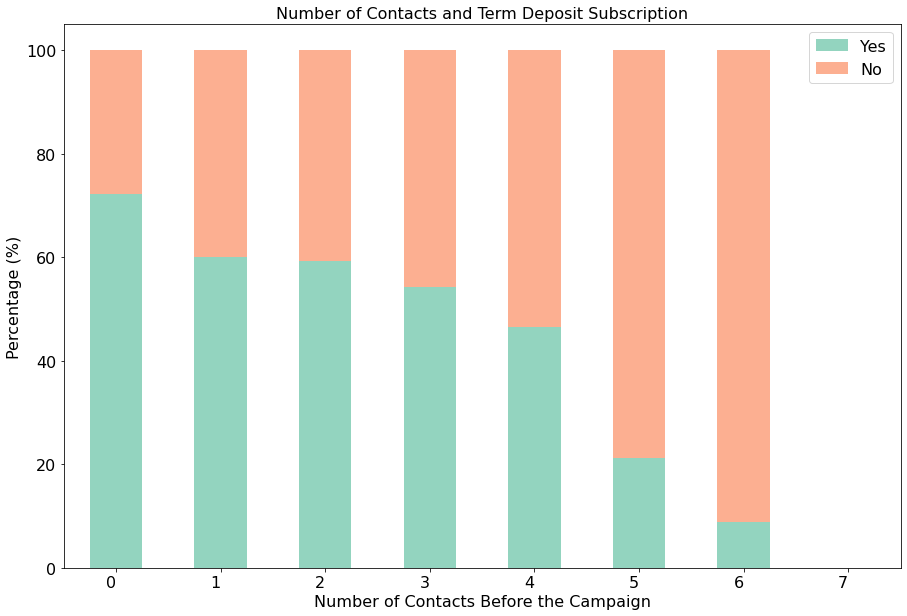

In [94]:
# Stacked Percentage Bar Graph
pg = pivot.sort_values(['yespor'],ascending=False).plot(kind='bar',stacked=True, figsize=(15,10), color=pal, alpha=0.7)
plt.title('Number of Contacts and Term Deposit Subscription', size=16)
plt.legend(title="Subscription", fontsize=16, fancybox=True)
pg.set_xticklabels(gprevious_y.get_xticklabels(), rotation=0, ha="right", size=16);
plt.yticks(fontsize=16)
plt.ylabel('Percentage (%)', size=16)
plt.xlabel('Number of Contacts Before the Campaign',size=16)
plt.legend(['Yes','No'], fontsize=16, loc='upper right')
plt.savefig('image/15_pg_previous_y_stacked.png',bbox_inches = 'tight')

### 4-16. poutcome<a class="anchor" id="4-16"></a>

- outcome of the previous marketing campaign 
- categorical: 
    - 'failure'
    - 'nonexistent'
    - 'success'

In [95]:
data['poutcome'].describe()

count           41188
unique              3
top       nonexistent
freq            35563
Name: poutcome, dtype: object

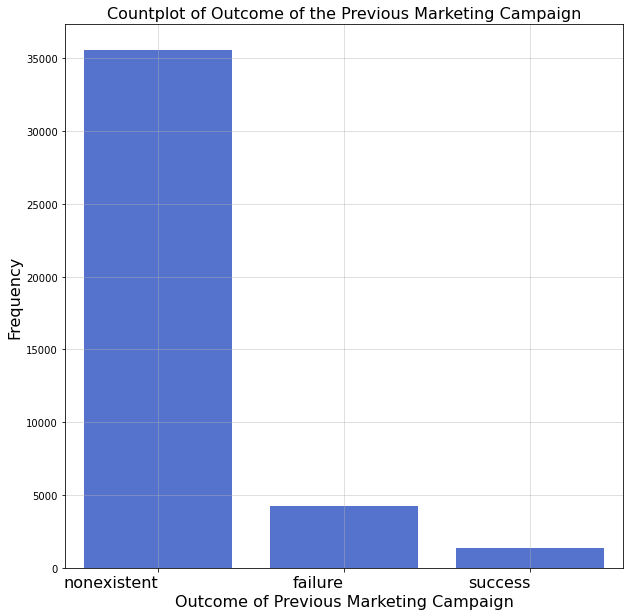

In [96]:
gpoutcome=sns.countplot(x="poutcome",data=data, color = "#4169E1");
gpoutcome.set_xticklabels(gpoutcome.get_xticklabels(), rotation=0, ha="right", size=16);
plt.title('Countplot of Outcome of the Previous Marketing Campaign',size = 16)
plt.grid(alpha=0.5)
plt.xlabel('Outcome of Previous Marketing Campaign',size=16)
plt.ylabel('Frequency',size=16)
plt.savefig('image/16_poutcome_countplot.png',bbox_inches = 'tight')

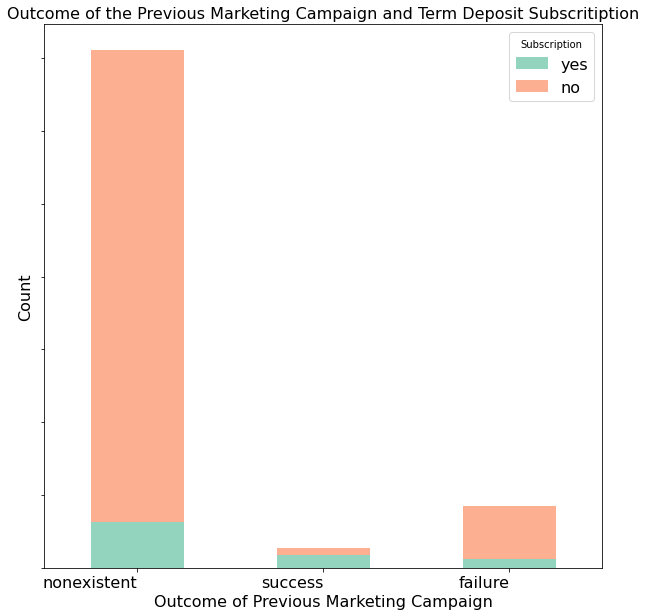

In [97]:
# Pivot Table 
poutcome_y_pivot = pd.pivot_table(data, columns='y', index='poutcome', aggfunc='count', values='age')
poutcome_y_pivot = poutcome_y_pivot[["yes","no"]] #change the order so that the "yes" is on the bottom
# Plot
# pal = sns.color_palette("Set2")
gpoutcome_y = poutcome_y_pivot.sort_values(['yes'],ascending=False).plot(kind='bar',stacked=True, color=pal, alpha=0.7)
plt.title('Outcome of the Previous Marketing Campaign and Term Deposit Subscritiption', size=16)
plt.legend(title="Subscription", fontsize=16, fancybox=True)
gpoutcome_y.set_xticklabels(gpoutcome_y.get_xticklabels(), rotation=0, ha="right",size=16);
gpoutcome_y.set_yticklabels(gpoutcome_y.get_yticklabels(), rotation=0, ha="right",size=16);
plt.ylabel('Count', size=16)
plt.xlabel('Outcome of Previous Marketing Campaign',size=16)
plt.savefig('image/16_poutcome_y_stacked.png',bbox_inches = 'tight')

In [98]:
# Proportion Table
pivot = poutcome_y_pivot 
pivot['total']=pivot['yes']+pivot['no']
pivot['yespor'] = pivot['yes']/pivot['total']*100
pivot['nopor'] = pivot['no']/pivot['total']*100
pivot.drop(['yes', 'no','total'], axis=1, inplace=True)

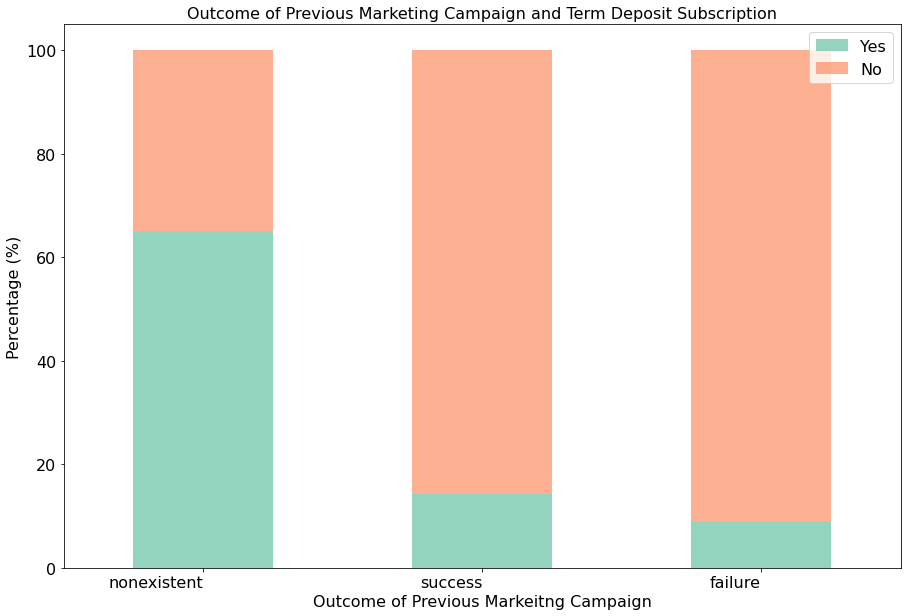

In [99]:
# Stacked Percentage Bar Graph
pg = pivot.sort_values(['yespor'],ascending=False).plot(kind='bar',stacked=True, figsize=(15,10), color=pal, alpha=0.7)
plt.title('Outcome of Previous Marketing Campaign and Term Deposit Subscription', size=16)
plt.legend(title="Subscription", fontsize=16, fancybox=True)
pg.set_xticklabels(gpoutcome_y.get_xticklabels(), rotation=0, ha="right", size=16);
plt.yticks(fontsize=16)
plt.ylabel('Percentage (%)', size=16)
plt.xlabel('Outcome of Previous Markeitng Campaign',size=16)
plt.legend(['Yes','No'], fontsize=16, loc='upper right')
plt.savefig('image/16_pg_poutcome_y_stacked.png',bbox_inches = 'tight')

### Social and Economic Context Attributes:

### 4-17. emp.var.rate <a class="anchor" id="4-17"></a>

- Employment Variation Rate
    - variation of how many people are being hired or fired due to the shifts in conditions of the economy
    - negative: more firing/ positive: more hiring? 
- Quartery indicator
- Numeric

In [100]:
data['emp.var.rate'].describe()

count    41188.000000
mean         0.081886
std          1.570960
min         -3.400000
25%         -1.800000
50%          1.100000
75%          1.400000
max          1.400000
Name: emp.var.rate, dtype: float64

In [101]:
data['emp.var.rate'].value_counts()

 1.4    16234
-1.8     9184
 1.1     7763
-0.1     3683
-2.9     1663
-3.4     1071
-1.7      773
-1.1      635
-3.0      172
-0.2       10
Name: emp.var.rate, dtype: int64

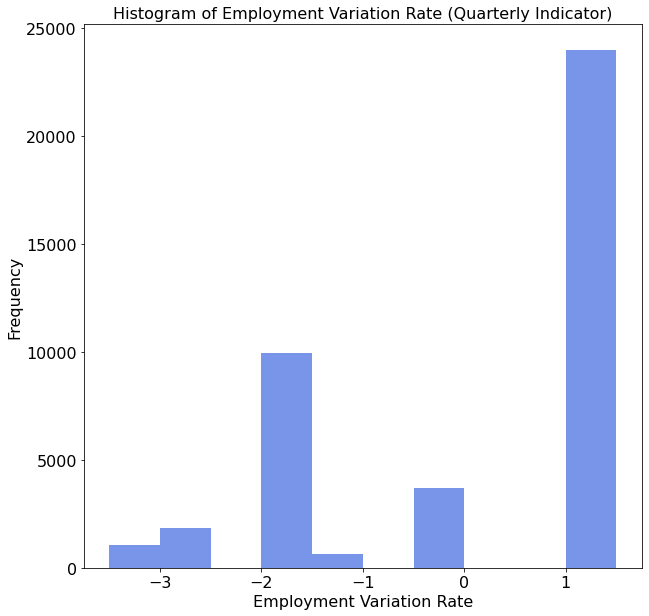

In [102]:
gemp= plt.hist(data['emp.var.rate'], color="#4169E1",alpha=0.7, bins=np.arange(-3.5,2,0.5))
plt.title('Histogram of Employment Variation Rate (Quarterly Indicator)',size=16)
plt.xlabel('Employment Variation Rate',size=16)
plt.ylabel('Frequency',size=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig('image/17_empvarrate_hist.png',bbox_inches = 'tight')
plt.show()

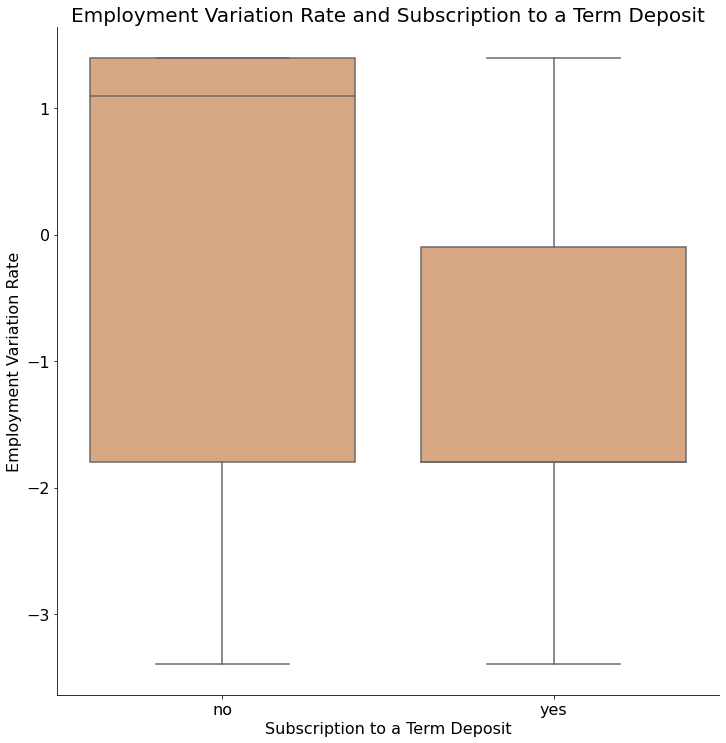

In [103]:
gemp_y = sns.catplot(x="y",y="emp.var.rate",data=data,  kind="box", height = 10, color="#e5a576")
plt.xlabel('Subscription to a Term Deposit',size=16)
plt.ylabel('Employment Variation Rate',rotation=90, size=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('Employment Variation Rate and Subscription to a Term Deposit',size = 20)
plt.savefig('image/17_emp_y_box.png',bbox_inches = 'tight')

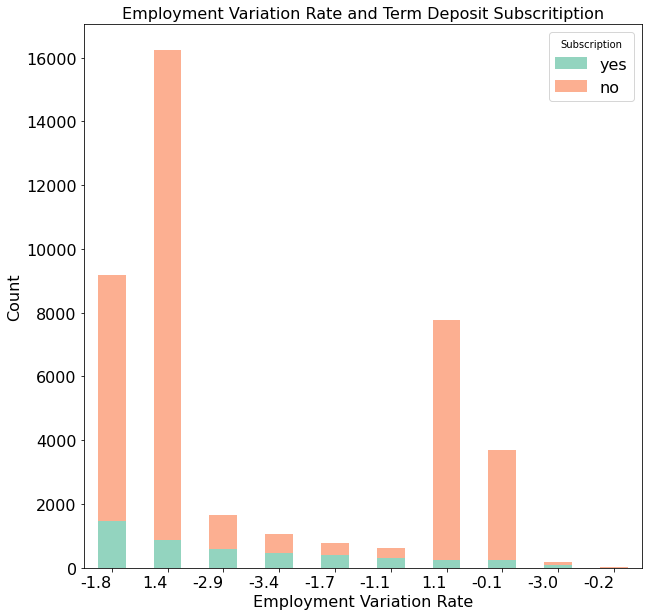

In [104]:
# Pivot Table 
emp_y_pivot = pd.pivot_table(data, columns='y', index='emp.var.rate', aggfunc='count', values='age')
emp_y_pivot = emp_y_pivot[["yes","no"]] #change the order so that the "yes" is on the bottom
# Plot
# pal = sns.color_palette("Set2")
gemp_y = emp_y_pivot.sort_values(['yes'],ascending=False).plot(kind='bar',stacked=True, color=pal, alpha=0.7)
plt.title('Employment Variation Rate and Term Deposit Subscritiption', size=16)
plt.legend(title="Subscription", fontsize=16, fancybox=True)
gemp_y.set_xticklabels(gemp_y.get_xticklabels(), rotation=0, ha="right",size=16);
plt.yticks(fontsize=16)
plt.ylabel('Count', size=16)
plt.xlabel('Employment Variation Rate',size=16)
plt.savefig('image/17_emp_y_stacked.png',bbox_inches = 'tight')

### 4-18. cons.price.idx<a class="anchor" id="4-18"></a>

- Consumer Price Index
    - measure of the average change overtime in the prices paid by urban consumers for a market basket of consumer goods and services
    - cpi of 120 means that prices are 20% higher than they were in the base period
- Monthly indicator 
- Numeric

In [105]:
data['cons.price.idx'].describe()

count    41188.000000
mean        93.575664
std          0.578840
min         92.201000
25%         93.075000
50%         93.749000
75%         93.994000
max         94.767000
Name: cons.price.idx, dtype: float64

In [106]:
len(data['cons.price.idx'].describe())

8

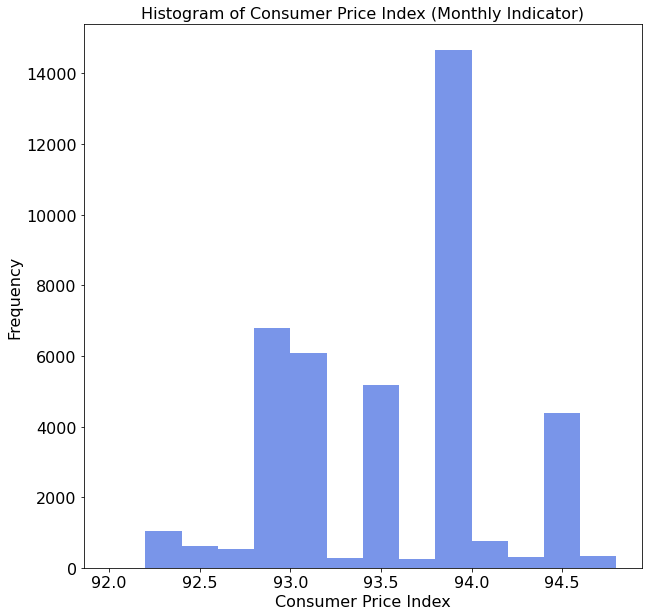

In [107]:
gcpi= plt.hist(data['cons.price.idx'], color="#4169E1",alpha=0.7, bins=np.arange(92,95,0.2))
plt.title('Histogram of Consumer Price Index (Monthly Indicator)',size=16)
plt.xlabel('Consumer Price Index',size=16)
plt.ylabel('Frequency',size=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig('image/18_cpi_hist.png',bbox_inches = 'tight')
plt.show()

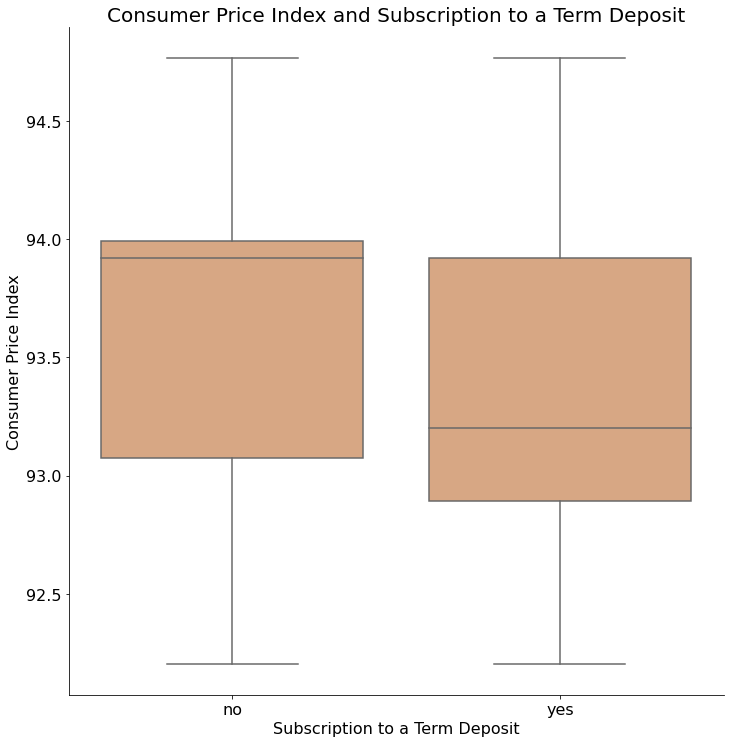

In [108]:
cpi_y = sns.catplot(x="y",y="cons.price.idx",data=data,  kind="box", height = 10, color="#e5a576")
plt.xlabel('Subscription to a Term Deposit',size=16)
plt.ylabel('Consumer Price Index',rotation=90, size=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('Consumer Price Index and Subscription to a Term Deposit',size = 20)
plt.savefig('image/18_cpi_y_box.png',bbox_inches = 'tight')

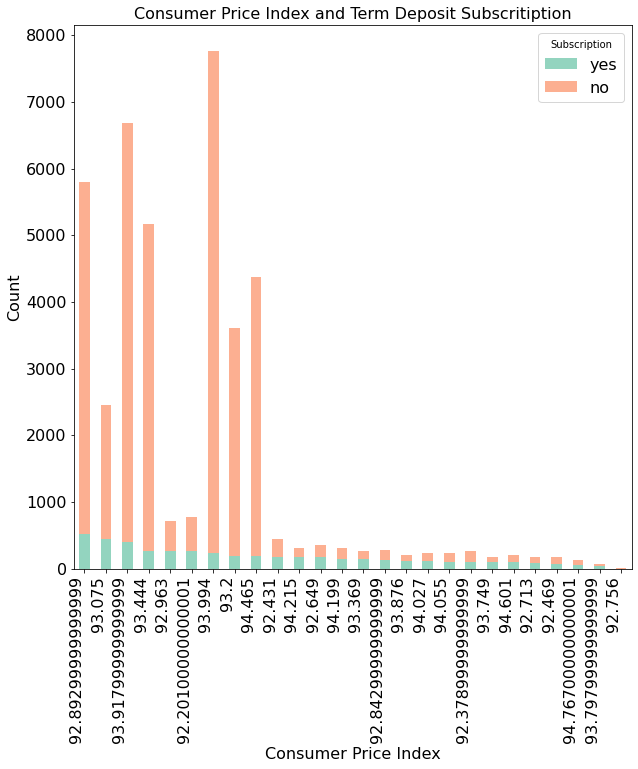

In [109]:
# Pivot Table 
cpi_y_pivot = pd.pivot_table(data, columns='y', index='cons.price.idx', aggfunc='count', values='age')
cpi_y_pivot = cpi_y_pivot[["yes","no"]] #change the order so that the "yes" is on the bottom
# Plot
# pal = sns.color_palette("Set2")
gcpi_y = cpi_y_pivot.sort_values(['yes'],ascending=False).plot(kind='bar',stacked=True, color=pal, alpha=0.7)
plt.title('Consumer Price Index and Term Deposit Subscritiption', size=16)
plt.legend(title="Subscription", fontsize=16, fancybox=True)
gcpi_y.set_xticklabels(gcpi_y.get_xticklabels(), rotation=90, ha="right",size=16);
plt.yticks(fontsize=16)
plt.ylabel('Count', size=16)
plt.xlabel('Consumer Price Index',size=16)
plt.savefig('image/18_cpi_y_stacked.png',bbox_inches = 'tight')

### 4-19. cons.conf.idx<a class="anchor" id="4-19"></a>

- Consumer Confidnece Ind
    - measures how optimistic or pessimistic consumers are regarding their expected financial situation.
- Monthly indicator
- Numeric

In [110]:
data['cons.conf.idx'].describe()

count    41188.000000
mean       -40.502600
std          4.628198
min        -50.800000
25%        -42.700000
50%        -41.800000
75%        -36.400000
max        -26.900000
Name: cons.conf.idx, dtype: float64

In [111]:
len(data['cons.conf.idx'].value_counts())

26

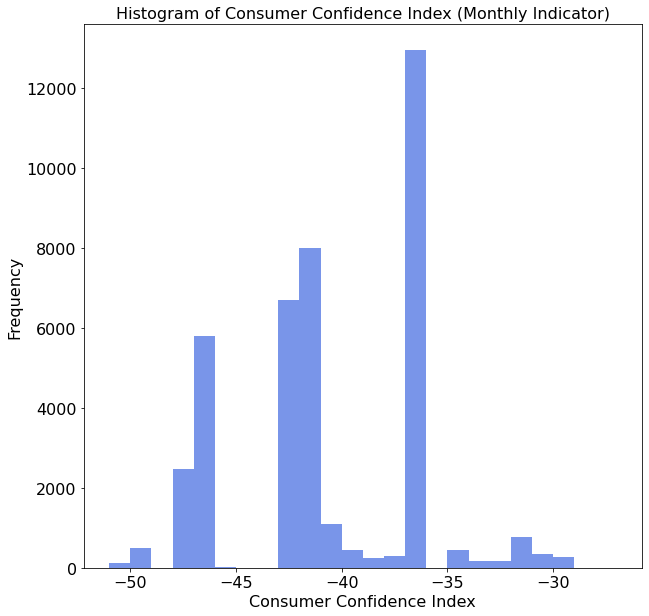

In [112]:
gcci= plt.hist(data['cons.conf.idx'], color="#4169E1",alpha=0.7, bins=np.arange(-51,-26,1))
plt.title('Histogram of Consumer Confidence Index (Monthly Indicator)',size=16)
plt.xlabel('Consumer Confidence Index',size=16)
plt.ylabel('Frequency',size=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig('image/19_cci_hist.png',bbox_inches = 'tight')
plt.show()

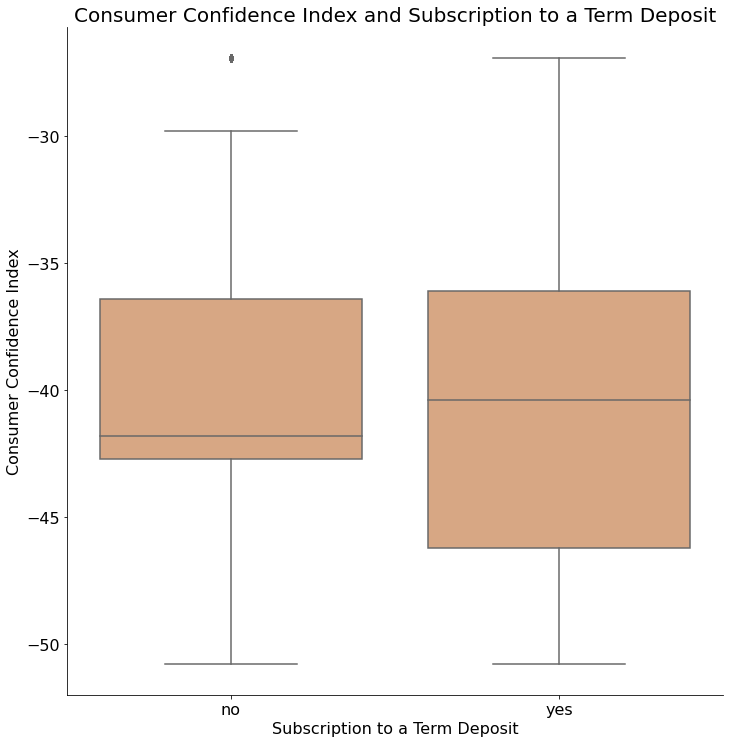

In [113]:
cci_y = sns.catplot(x="y",y="cons.conf.idx",data=data,  kind="box", height = 10, color="#e5a576")
plt.xlabel('Subscription to a Term Deposit',size=16)
plt.ylabel('Consumer Confidence Index',rotation=90, size=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('Consumer Confidence Index and Subscription to a Term Deposit',size = 20)
plt.savefig('image/19_cci_y_box.png',bbox_inches = 'tight')

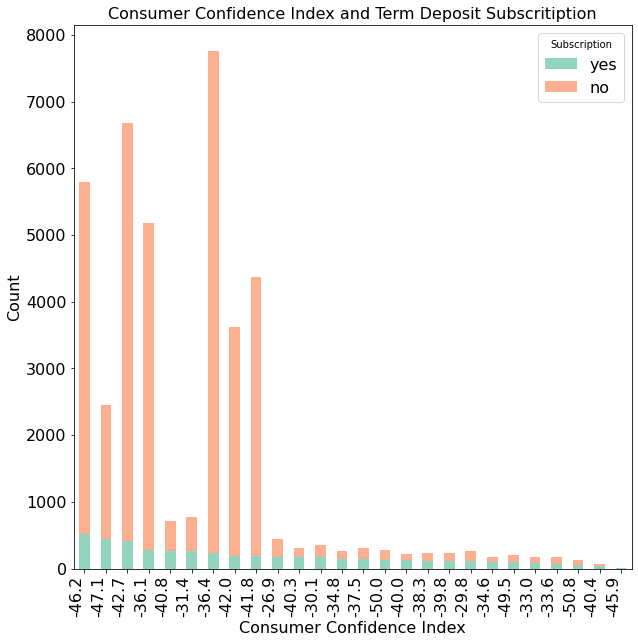

In [114]:
# Pivot Table 
cci_y_pivot = pd.pivot_table(data, columns='y', index='cons.conf.idx', aggfunc='count', values='age')
cci_y_pivot = cci_y_pivot[["yes","no"]] #change the order so that the "yes" is on the bottom
# Plot
# pal = sns.color_palette("Set2")
gcci_y = cci_y_pivot.sort_values(['yes'],ascending=False).plot(kind='bar',stacked=True, color=pal, alpha=0.7)
plt.title('Consumer Confidence Index and Term Deposit Subscritiption', size=16)
plt.legend(title="Subscription", fontsize=16, fancybox=True)
gcci_y.set_xticklabels(gcci_y.get_xticklabels(), rotation=90, ha="right",size=16);
plt.yticks(fontsize=16)
plt.ylabel('Count', size=16)
plt.xlabel('Consumer Confidence Index',size=16)
plt.savefig('image/19_cci_y_stacked.png',bbox_inches = 'tight')

### 4-20. euribor3m<a class="anchor" id="4-5"></a>

- euribor 3 month rate  
    - Euro Interbank Offered Rate
    - Average interest rates at which a larger panel of European banks borrow funds from one another 
- daily indicator 
- numeric

In [115]:
data['euribor3m'].describe()

count    41188.000000
mean         3.621291
std          1.734447
min          0.634000
25%          1.344000
50%          4.857000
75%          4.961000
max          5.045000
Name: euribor3m, dtype: float64

In [116]:
len(data['euribor3m'].value_counts())

316

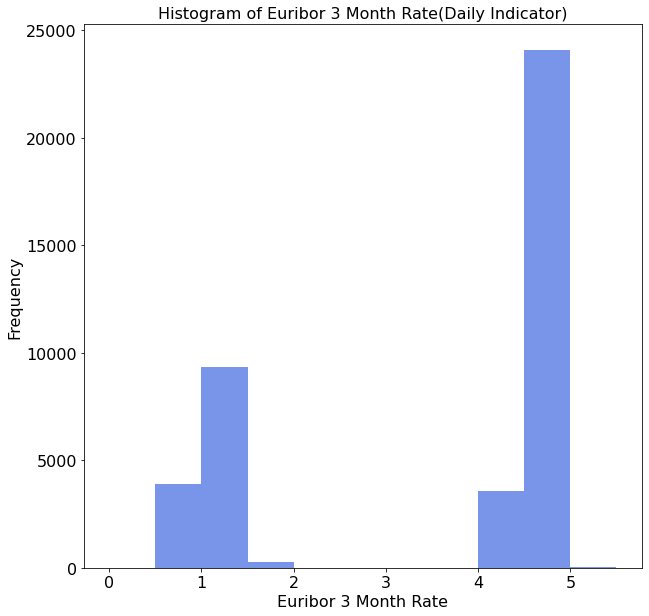

In [117]:
geuri= plt.hist(data['euribor3m'], color="#4169E1",alpha=0.7, bins=np.arange(0,6,0.5))
plt.title('Histogram of Euribor 3 Month Rate(Daily Indicator)',size=16)
plt.xlabel('Euribor 3 Month Rate',size=16)
plt.ylabel('Frequency',size=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig('image/20_euri_hist.png',bbox_inches = 'tight')
plt.show()

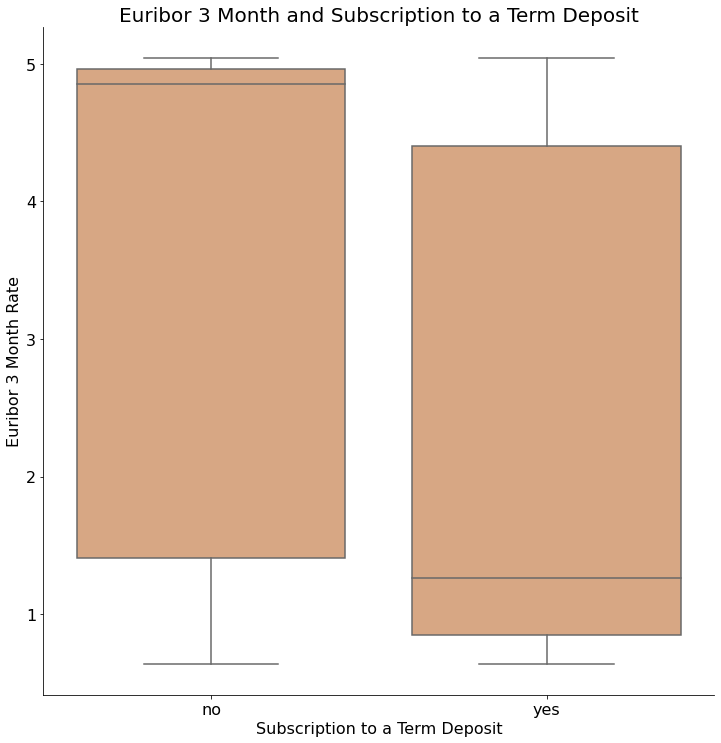

In [118]:
euri_y = sns.catplot(x="y",y="euribor3m",data=data,  kind="box", height = 10, color="#e5a576")
plt.xlabel('Subscription to a Term Deposit',size=16)
plt.ylabel('Euribor 3 Month Rate',rotation=90, size=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('Euribor 3 Month and Subscription to a Term Deposit',size = 20)
plt.savefig('image/20_euri_y_box.png',bbox_inches = 'tight')

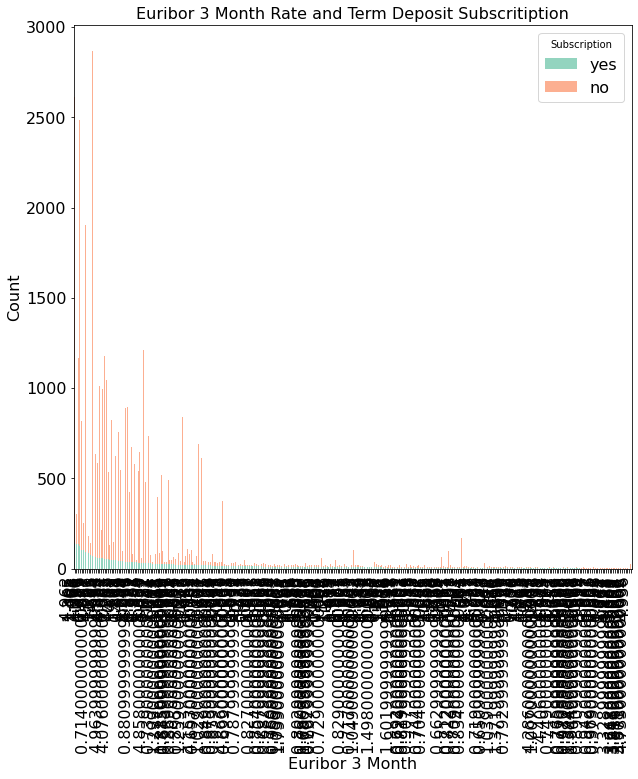

In [119]:
# Pivot Table 
euri_y_pivot = pd.pivot_table(data, columns='y', index='euribor3m', aggfunc='count', values='age')
euri_y_pivot = euri_y_pivot[["yes","no"]] #change the order so that the "yes" is on the bottom
# Plot
# pal = sns.color_palette("Set2")
geuri_y = euri_y_pivot.sort_values(['yes'],ascending=False).plot(kind='bar',stacked=True, color=pal, alpha=0.7)
plt.title('Euribor 3 Month Rate and Term Deposit Subscritiption', size=16)
plt.legend(title="Subscription", fontsize=16, fancybox=True)
geuri_y.set_xticklabels(geuri_y.get_xticklabels(), rotation=90, ha="right",size=16);
plt.yticks(fontsize=16)
plt.ylabel('Count', size=16)
plt.xlabel('Euribor 3 Month',size=16)
plt.savefig('image/20_euri_y_stacked.png',bbox_inches = 'tight')

### 4-21. nr.employed<a class="anchor" id="4-21"></a>

- number of employees 
- quarterly indicator 
- numeric

In [120]:
data['nr.employed'].describe()

count    41188.000000
mean      5167.035911
std         72.251528
min       4963.600000
25%       5099.100000
50%       5191.000000
75%       5228.100000
max       5228.100000
Name: nr.employed, dtype: float64

In [121]:
len(data['nr.employed'].value_counts())

11

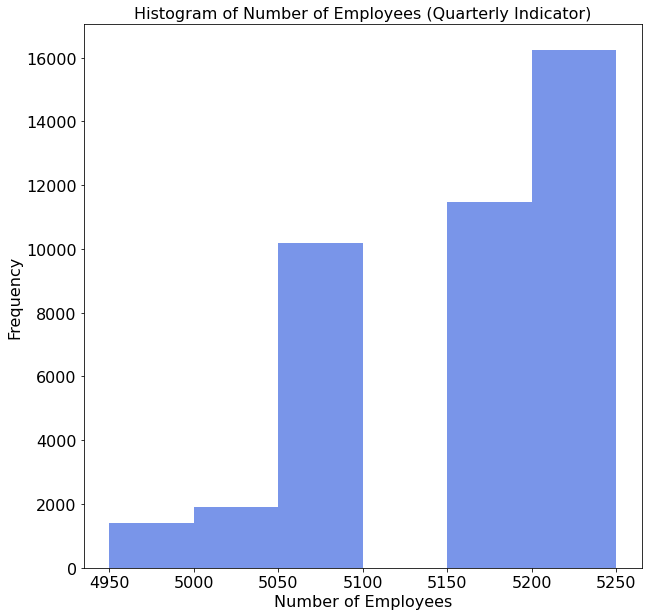

In [122]:
gnemp= plt.hist(data['nr.employed'], color="#4169E1",alpha=0.7, bins=np.arange(4950,5300,50))
plt.title('Histogram of Number of Employees (Quarterly Indicator)',size=16)
plt.xlabel('Number of Employees',size=16)
plt.ylabel('Frequency',size=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig('image/21_numemployee_hist.png',bbox_inches = 'tight')
plt.show()

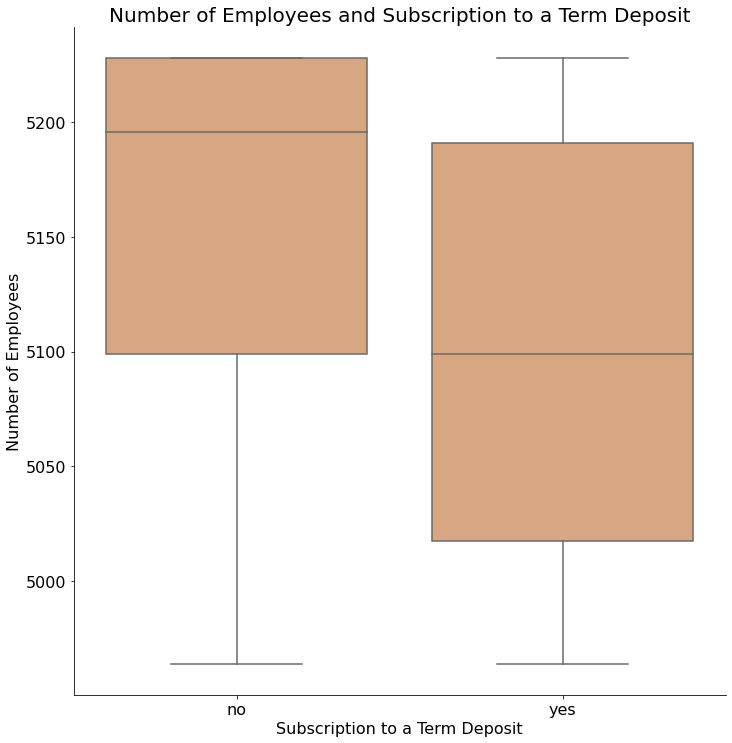

In [123]:
nemp_y = sns.catplot(x="y",y="nr.employed",data=data,  kind="box", height = 10, color="#e5a576")
plt.xlabel('Subscription to a Term Deposit',size=16)
plt.ylabel('Number of Employees',rotation=90, size=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('Number of Employees and Subscription to a Term Deposit',size = 20)
plt.savefig('image/21_nemp_y_box.png',bbox_inches = 'tight')

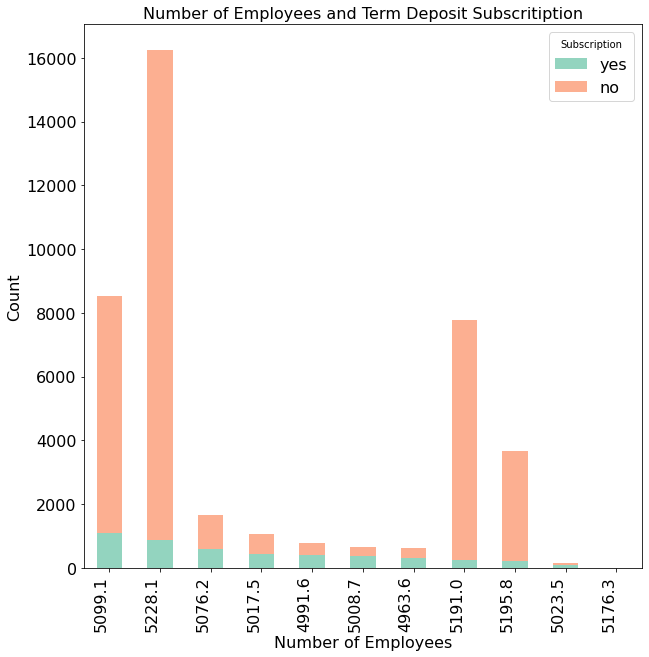

In [124]:
# Pivot Table 
nemp_y_pivot = pd.pivot_table(data, columns='y', index='nr.employed', aggfunc='count', values='age')
nemp_y_pivot = nemp_y_pivot[["yes","no"]] #change the order so that the "yes" is on the bottom
# Plot
# pal = sns.color_palette("Set2")
nemp_y = nemp_y_pivot.sort_values(['yes'],ascending=False).plot(kind='bar',stacked=True, color=pal, alpha=0.7)
plt.title('Number of Employees and Term Deposit Subscritiption', size=16)
plt.legend(title="Subscription", fontsize=16, fancybox=True)
nemp_y.set_xticklabels(nemp_y.get_xticklabels(), rotation=90, ha="right",size=16);
plt.yticks(fontsize=16)
plt.ylabel('Count', size=16)
plt.xlabel('Number of Employees',size=16)
plt.savefig('image/21_nemp_y_stacked.png',bbox_inches = 'tight')

## 5. Correlation <a class="anchor" id="Correlation"></a>

Correlation between numeric variables 

In [125]:
int_column = data.dtypes[data.dtypes == 'int64'].index | data.dtypes[data.dtypes == 'float64'].index
int_column

Index(['age', 'campaign', 'cons.conf.idx', 'cons.price.idx', 'duration',
       'emp.var.rate', 'euribor3m', 'nr.employed', 'pdays', 'previous'],
      dtype='object')

In [126]:
obj_column = data.dtypes[data.dtypes == 'object'].index
obj_column

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

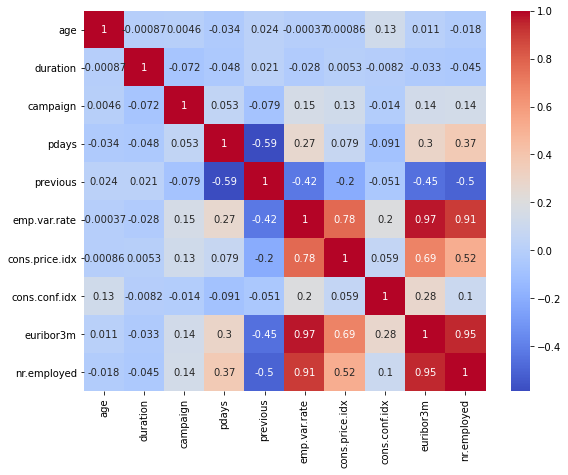

In [127]:
plt.figure(figsize=(9,7))
sns.heatmap(data.corr(),annot=True,cmap = "coolwarm")
plt.savefig('image/correlation.png',bbox_inches = 'tight')

In [128]:
df_cor = data.copy()
df_cor['y'] = df_cor.y.apply(lambda x:0 if x=='no' else 1)

In [129]:
from sklearn.preprocessing import LabelEncoder
dict_df = pd.DataFrame()
for col in obj_column:
    labelencoder = LabelEncoder()
    df_cor[col] = labelencoder.fit_transform(df_cor[col])
    dict_df[col] = df_cor[col]
    dict_df['_'+col] =  labelencoder.inverse_transform(df_cor[col])

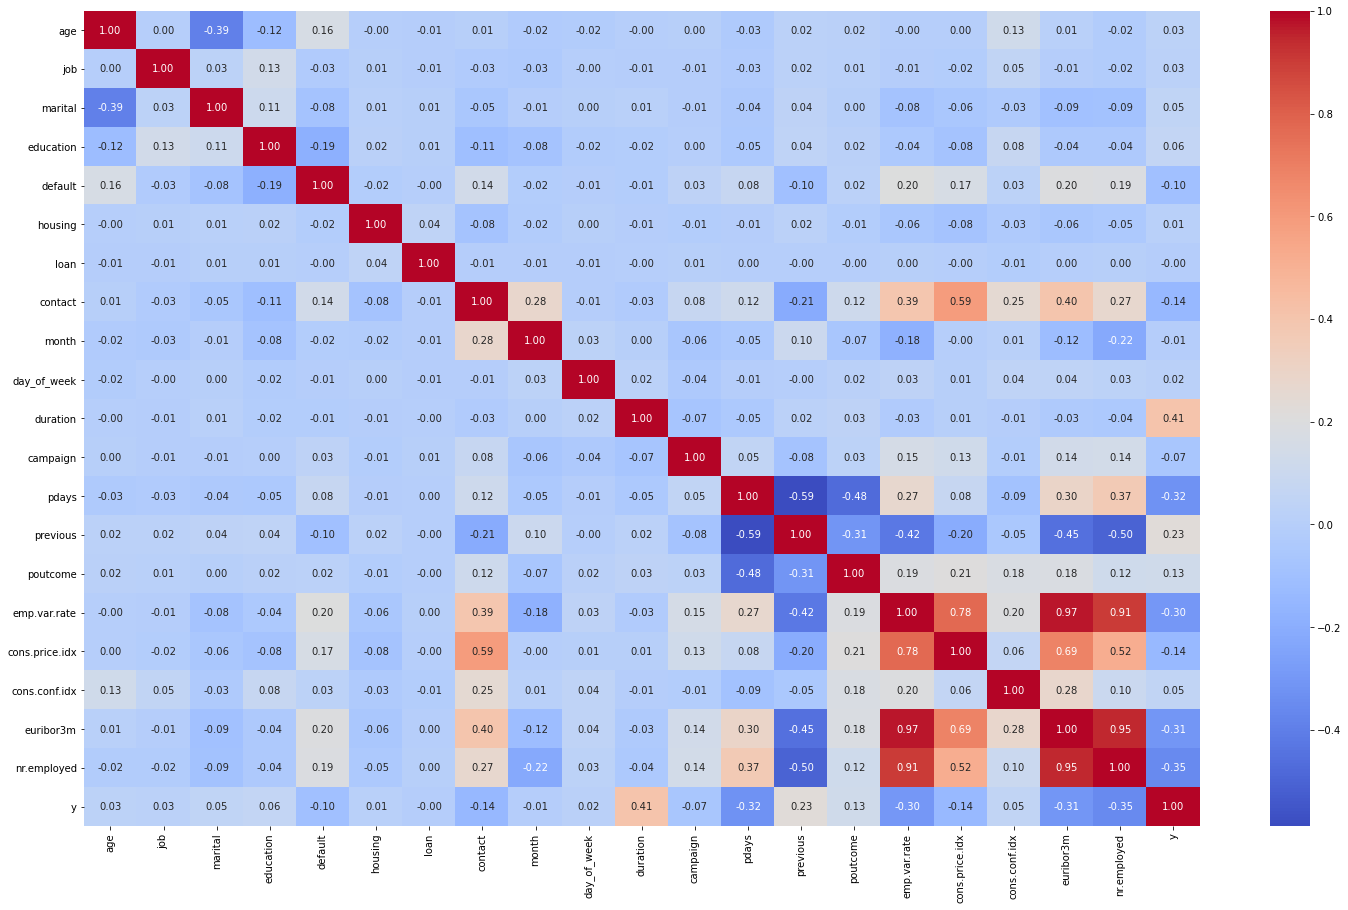

In [130]:
plt.figure(figsize=(25,15))
sns.heatmap(df_cor.corr(), annot=True, fmt = ".2f", cmap = "coolwarm")

## 6. Export the Data <a class="anchor" id="ExportData"></a>

In [131]:
data.to_csv('bankmarketinganalysis_1EDA.csv', index = True)